In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import statistics

# Premiere Project: Investigate a Dataset (DIVORCE DECISION)

## Table of Contents
<ul>
<li><a href="#INTRODUCTION">Introduction</a></li>
<li><a href="#EXPLORATORY-DATA-ANALYSIS">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
  
</ul>

# INTRODUCTION

## Data Description :

The Divorce Prediction dataset contains information about the answers to the 54 questions asked from 150 married people  Each question had different probabilities of impact. Answers are on a 5-point scale (0 = Never, 1 = Rarely, 2 = Average, 3 = Often, 4 = Always). We can use this dataset to predict whether a married couple will divorce.The dataset was sourced from Kaggle website.The 54 variables or questions called data dictionary are:

1. Q1= If one of us apologizes when our discussion deteriorates, the discussion ends.

2. Q2= I know we can ignore our differences, even if things get hard sometimes.

3. Q3= When we need it, we can take our discussions with my spouse from the beginning and correct it.

4. Q4= When I discuss with my spouse, contacting him will eventually work.

5. Q5= The time I spent with my wife is special for us.

6. Q6= We don't have time at home as partners.

7. Q7= We are like two strangers who share the same environment at home rather than family.

8. Q8= I enjoy our holidays with my wife.

9. Q9= I enjoy traveling with my wife.

10. Q10= Most of our goals are common to my spouse.

11. Q11= I think that one day in the future, when I look back, I see that my spouse and I have been in harmony with each other.

12. Q12= My spouse and I have similar values in terms of personal freedom.

13. Q13= My spouse and I have similar sense of entertainment.

14. Q14= Most of our goals for people (children, friends, etc.) are the same.

15. Q15= Our dreams with my spouse are similar and harmonious.

16. Q16= We're compatible with my spouse about what love should be.

17. Q17= We share the same views about being happy in our life with my spouse

18. Q18= My spouse and I have similar ideas about how marriage should be

19. Q19= My spouse and I have similar ideas about how roles should be in marriage

20. Q20= My spouse and I have similar values in trust.

21. Q21= I know exactly what my wife likes.

22. Q22= I know how my spouse wants to be taken care of when she/he sick.

23. Q23= I know my spouse's favorite food.

24. Q24= I can tell you what kind of stress my spouse is facing in her/his life.

25. Q25= I have knowledge of my spouse's inner world.

26. Q26= I know my spouse's basic anxieties.

27. Q27= I know what my spouse's current sources of stress are.

28. Q28= I know my spouse's hopes and wishes.

29. Q29= I know my spouse very well.

30. Q30= I know my spouse's friends and their social relationships.

31. Q31= I feel aggressive when I argue with my spouse.

32. Q32= When discussing with my spouse, I usually use expressions such as ‘you always’ or ‘you never’ .

33. Q33= I can use negative statements about my spouse's personality during our discussions.

34. Q34= I can use offensive expressions during our discussions.

35. Q35= I can insult my spouse during our discussions.

36. Q36= I can be humiliating when we discussed.

37. Q37= My discussion with my spouse is not calm.

38. Q38= I hate my spouse's way of open a subject.

39. Q39= Our discussions often occur suddenly.

40. Q40= We're just starting a discussion before I know what's going on.

41. Q41= When I talk to my spouse about something, my calm suddenly breaks.

42. Q42= When I argue with my spouse, ı only go out and I don't say a word.

43. Q43= I mostly stay silent to calm the environment a little bit.

44. Q44= Sometimes I think it's good for me to leave home for a while.

45. Q45= I'd rather stay silent than discuss with my spouse.

46. Q46= Even if I'm right in the discussion, I stay silent to hurt my spouse.

47. Q47= When I discuss with my spouse, I stay silent because I am afraid of not being able to control my anger.

48. Q48= I feel right in our discussions.

49. Q49= I have nothing to do with what I've been accused of.

50. Q50= I'm not actually the one who's guilty about what I'm accused of.

51. Q51= I'm not the one who's wrong about problems at home.

52. Q52= I wouldn't hesitate to tell my spouse about her/his inadequacy.

53. Q53= When I discuss, I remind my spouse of her/his inadequacy.

54. Q54= I'm not afraid to tell my spouse about her/his incompetence.

# RESEARCH QUESTIONS:

    how each question relates with Divorce column  
    what decisions are popular across divorces 
    what decisions are popular across everyone 
    corelation between questions
    whats the most agreeable question 
    most imortant questions


In [2]:
divorce = pd.read_csv('divorce_data-1.csv')
divorce

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q46,Q47,Q48,Q49,Q50,Q51,Q52,Q53,Q54,Divorce
0,2,2,4,1,0,0,0,0,0,0,...,2,1,3,3,3,2,3,2,1,1
1,4,4,4,4,4,0,0,4,4,4,...,2,2,3,4,4,4,4,2,2,1
2,2,2,2,2,1,3,2,1,1,2,...,3,2,3,1,1,1,2,2,2,1
3,3,2,3,2,3,3,3,3,3,3,...,2,2,3,3,3,3,2,2,2,1
4,2,2,1,1,1,1,0,0,0,0,...,2,1,2,3,2,2,2,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,0,0,0,0,0,0,0,0,0,0,...,1,0,4,1,1,4,2,2,2,0
146,0,0,0,0,0,0,0,0,0,0,...,4,1,2,2,2,2,3,2,2,0
147,1,1,0,0,0,0,0,0,0,1,...,3,0,2,0,1,1,3,0,0,0
148,0,0,0,0,0,0,0,0,0,0,...,3,3,2,2,3,2,4,3,1,0


In [3]:
divorce.describe()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q46,Q47,Q48,Q49,Q50,Q51,Q52,Q53,Q54,Divorce
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,...,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.00000
mean,1.606667,1.513333,1.633333,1.366667,1.340000,0.726667,0.486667,1.280000,1.280000,1.473333,...,2.413333,2.080000,2.620000,2.220000,2.266667,2.313333,2.360000,2.053333,1.786667,0.44000
std,1.609104,1.445830,1.420921,1.516870,1.583599,0.911498,0.939346,1.515557,1.541898,1.431649,...,1.361930,1.560932,1.109265,1.487622,1.378973,1.237754,1.480432,1.469085,1.624422,0.49805
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.00000
50%,1.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,3.000000,2.000000,3.000000,2.000000,2.000000,2.000000,3.000000,2.000000,1.000000,0.00000
75%,3.000000,3.000000,3.000000,3.000000,3.000000,1.000000,1.000000,3.000000,3.000000,3.000000,...,4.000000,4.000000,3.000000,4.000000,4.000000,3.000000,4.000000,3.000000,4.000000,1.00000
max,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,1.00000


In [4]:
# functions for plotting 
def percent_dis_q_divorce(i):
    x,y = i, 'Divorce'

    df1 = divorce.groupby(x)[y].value_counts(normalize=True)
    df1 = df1.mul(100)
    df1 = df1.rename('percent').reset_index()

    sns.catplot(x=x,y='percent',col = y,kind='bar',data=df1).fig.suptitle('perrcent dist of ' + i +" with Divorce")

def dis_q_divorce(i):
    sns.catplot(x=i, col="Divorce",data=divorce, kind="count").fig.suptitle('dist of ' + i +" with Divorce")

def percnt_dist_people_across_q(i):
    sns.histplot(x = divorce[i], hue=divorce['Divorce'], multiple="dodge", stat = 'probability',discrete =True,shrink = 0.8, common_norm=False)

In [5]:
#check mode of columns
qAgreable ={}
for i in divorce.columns:
    qAgreable[i] = statistics.mode(divorce[i])
    
QAG = pd.Series(qAgreable)

In [6]:
QAG =  pd.DataFrame(QAG, columns=['pop_answer'])
Most_ag = QAG[QAG.pop_answer >0]
Most_ag

,pop_answer
Q43,4
Q45,4
Q46,3
Q47,4
Q48,3
Q49,4
Q50,4
Q51,2
Q52,4
Q53,4


OBSERVATIONS : MOST PEOPLE DISAGREE WITH THE QUESTIONS except ['Q43','Q45','Q46','Q47','Q48','Q49','Q50','Q51','Q52','Q53']

In [7]:
question_ag = ['Q43','Q45','Q46','Q47','Q48','Q49','Q50','Q51','Q52','Q53']

OBSERVATIONS : MOST PEOPLE AGREE WITH THE QUESTIONS [Q43,Q45,Q46,Q47,Q48,Q49,Q50,Q51,Q52,Q53] why?

In [8]:
atr='''
1 If one of us apologizes when our discussion deteriorates, the discussion ends.
2 I know we can ignore our differences, even if things get hard sometimes.
3 When we need it, we can take our discussions with my spouse from the beginning and correct it.
4 When I discuss with my spouse, to contact him will eventually work.
5 The time I spent with my wife is special for us.
6 We don't have time at home as partners.
7 We are like two strangers who share the same environment at home rather than family.
8 I enjoy our holidays with my wife.
9 I enjoy traveling with my wife.
10 Most of our goals are common to my spouse.
11 I think that one day in the future, when I look back, I see that my spouse and I have been in harmony with each other.
12 My spouse and I have similar values in terms of personal freedom.
13 My spouse and I have similar sense of entertainment.
14 Most of our goals for people (children, friends, etc) are the same.
15 Our dreams with my spouse are similar and harmonious.
16 We're compatible with my spouse about what love should be.
17 We share the same views about being happy in our life with my spouse.
18 My spouse and I have similar ideas about how marriage should be.
19 My spouse and I have similar ideas about how roles should be in marriage.
20 My spouse and I have similar values in trust.
21 I know exactly what my wife likes.
22 I know how my spouse wants to be taken care of when she/he sick.
23 I know my spouse's favorite food.
24 I can tell you what kind of stress my spouse is facing in her/his life.
25 I have knowledge of my spouse's inner world.
26 I know my spouse's basic anxieties.
27 I know what my spouse's current sources of stress are.
28 I know my spouse's hopes and wishes.
29 I know my spouse very well.
30 I know my spouse's friends and their social relationships.
31 I feel aggressive when I argue with my spouse.
32 When discussing with my spouse, I usually use expressions such as ‘you always’ or ‘you never’ .
33 I can use negative statements about my spouse's personality during our discussions.
34 I can use offensive expressions during our discussions.
35 I can insult my spouse during our discussions.
36 I can be humiliating when we discussions.
37 My discussion with my spouse is not calm.
38 I hate my spouse's way of open a subject.
39 Our discussions often occur suddenly.
40 We're just starting a discussion before I know what's going on.
41 When I talk to my spouse about something, my calm suddenly breaks.
42 When I argue with my spouse, ı only go out and I don't say a word.
43 I mostly stay silent to calm the environment a little bit.
44 Sometimes I think it's good for me to leave home for a while.
45 I'd rather stay silent than discuss with my spouse.
46 Even if I'm right in the discussion, I stay silent to hurt my spouse.
47 When I discuss with my spouse, I stay silent because I am afraid of not being able to control my anger.
48 I feel right in our discussions.
49 I have nothing to do with what I've been accused of.
50 I'm not actually the one who's guilty about what I'm accused of.
51 I'm not the one who's wrong about problems at home.
52 I wouldn't hesitate to tell my spouse about her/his inadequacy.
53 When I discuss, I remind my spouse of her/his inadequacy.
54 I'm not afraid to tell my spouse about her/his incompetence.'''

quest=[]
line=""
for s in atr:
    if s=="\n":continue
    line=line+s
    if s==".":
        quest.append(line)
        line=""


cols=divorce.drop("Divorce",axis=1).columns
perc={}
for col in cols:
    perc[col]=round(divorce[col].value_counts(normalize=True)*100,2)
result=pd.DataFrame(perc).T
result.index=quest

result.style\
    .highlight_max(color = 'lightblue',axis=1)\
    .highlight_min(color = 'lightgreen',axis=1)\
    .format('{:.0f}%')

,0,1,2,3,4
"1 If one of us apologizes when our discussion deteriorates, the discussion ends.",45%,6%,9%,24%,16%
"2 I know we can ignore our differences, even if things get hard sometimes.",38%,15%,15%,21%,11%
"3 When we need it, we can take our discussions with my spouse from the beginning and correct it.",33%,15%,16%,25%,10%
"4 When I discuss with my spouse, to contact him will eventually work.",49%,8%,13%,18%,12%
5 The time I spent with my wife is special for us.,53%,7%,5%,22%,13%
6 We don't have time at home as partners.,52%,29%,15%,3%,1%
7 We are like two strangers who share the same environment at home rather than family.,70%,21%,3%,3%,3%
8 I enjoy our holidays with my wife.,53%,6%,10%,21%,10%
9 I enjoy traveling with my wife.,55%,4%,8%,23%,10%
10 Most of our goals are common to my spouse.,40%,12%,19%,19%,10%


# distrubtion of divorce

0    0.56
1    0.44
Name: Divorce, dtype: float64


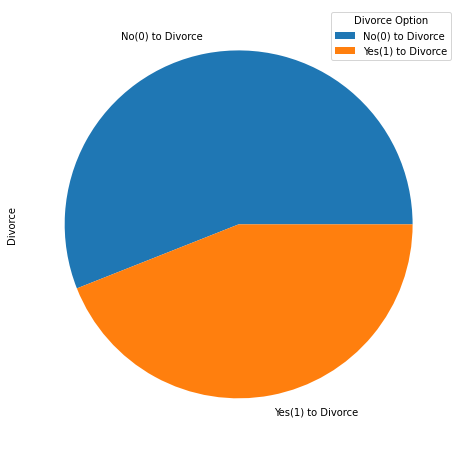

In [11]:
print(divorce.Divorce.value_counts(normalize  = True))
my_labels=('No(0) to Divorce','Yes(1) to Divorce')
divorce.Divorce.value_counts().plot(kind='pie',figsize=(8,8),labels=my_labels);

plt.legend(title= 'Divorce Option')


# distribution of answers across the data set

<AxesSubplot:>

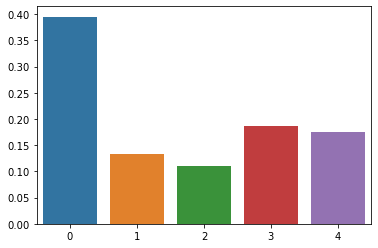

In [13]:

cols=divorce.drop("Divorce",axis=1).columns
perc={}
for col in cols:
    perc[col]=divorce[col].value_counts()
result=pd.DataFrame(perc).T
result.index=cols

result.style\
    .highlight_max(color = 'lightblue',axis=1)\
    .highlight_min(color = 'lightgreen',axis=1)

Resultv = result

tots = [Resultv[i].sum() for i in Resultv.columns]
ptots = [x/sum(tots) for x in tots]
sns.barplot(x=[0,1,2,3,4],y=ptots)

# corelation between amount of positive/negative answers and amount of divorced individuals

<AxesSubplot:>

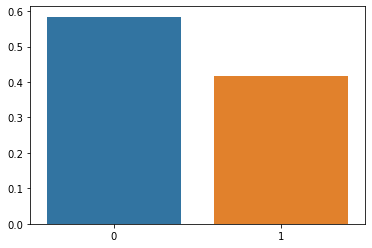

In [14]:
#pecerntage of answers positive or negative
tot = []
tot.append(tots[0]+tots[1]+(tots[2]/2))
tot.append(tots[3]+tots[4]+(tots[2]/2))
tots = tots[0:2]
ptots = [x/sum(tot) for x in tot]
sns.barplot(x=[0,1],y=ptots)

<AxesSubplot:>

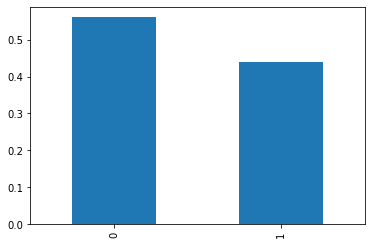

In [10]:
divorce['Divorce'].value_counts(normalize=True).plot(kind='bar')

In [11]:
div = divorce['Divorce'].value_counts(normalize=True)
div
ptots

[0.5841975308641976, 0.4158024691358025]

<AxesSubplot:>

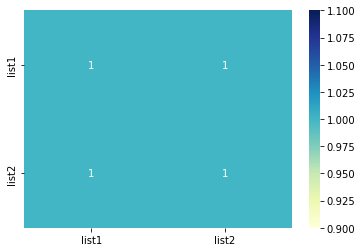

In [12]:
df = pd.DataFrame({"list1" : ptots,
                   "list2" : div})
corr = df.corr()
# We compute and show the correlation between those two lists
sns.heatmap(corr,xticklabels=corr.columns,
        yticklabels=corr.columns,
        cmap="YlGnBu", annot = True)

theres a strong corelation between amount of posivtive answer and amount of divored people
on average across the set of questions the more positive the answer the more chance of bieng divorce there a corellation on average

# correlation between qeustions

In [13]:
col_names = divorce.drop('Divorce',axis = 1).columns

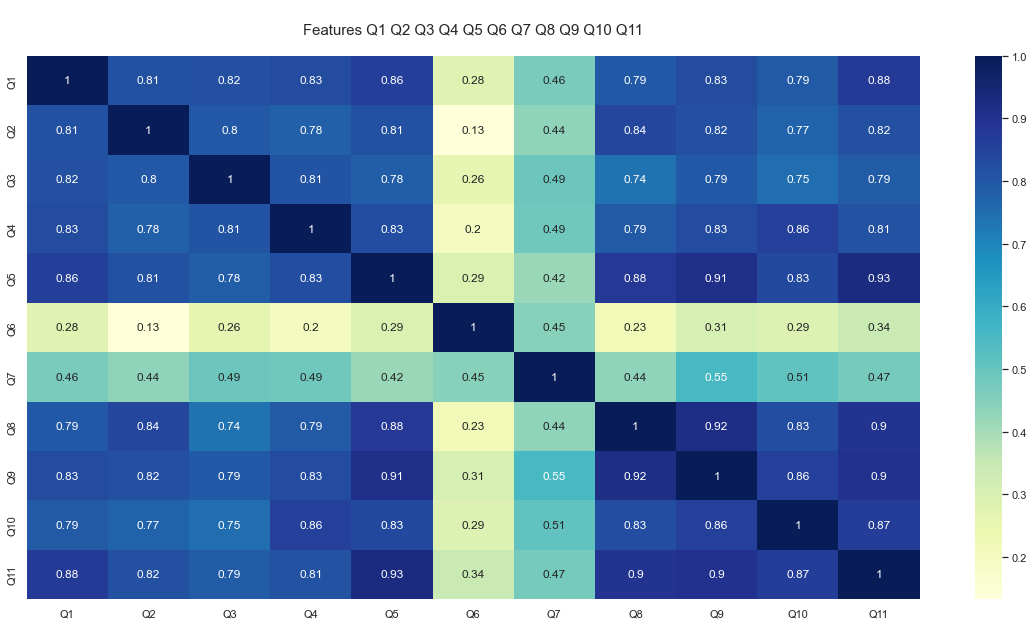

In [64]:

corr=divorce[col_names[:11]].corr()
sns.set(rc={'figure.figsize':(20,10)})
p=sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        cmap="YlGnBu", annot = True)
p=p.axes.set_title("\n"+"Features "+' '.join([str(elem) for elem in col_names[:11]])+"\n",fontsize=15);


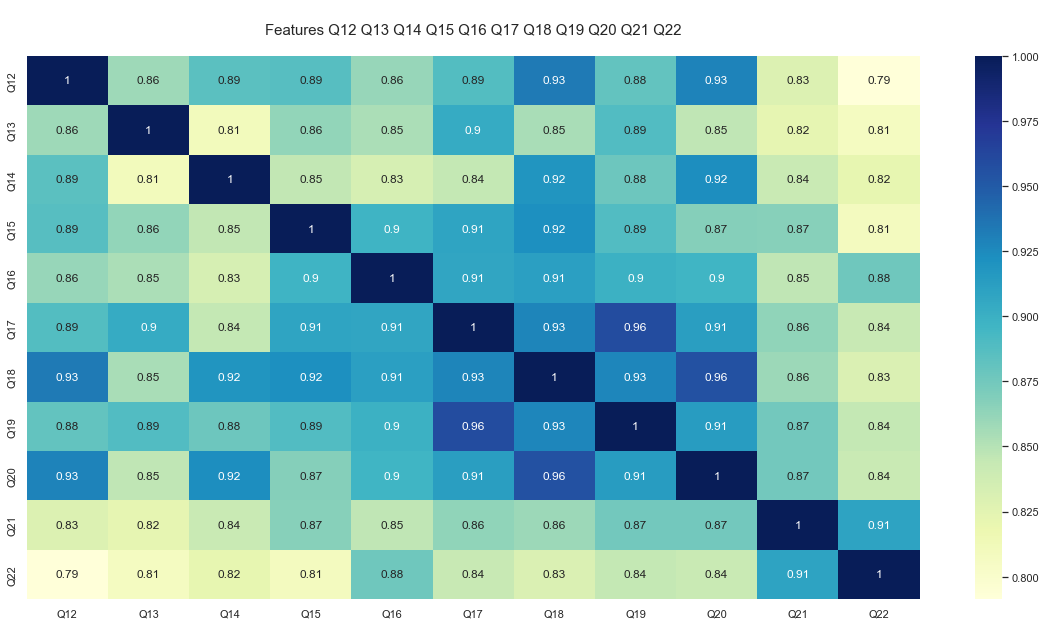

In [15]:
corr=divorce[col_names[11:22]].corr()

sns.set(rc={'figure.figsize':(20,10)})
p=sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        cmap="YlGnBu", annot = True)
p=p.axes.set_title("\n"+"Features "+' '.join([str(elem) for elem in col_names[11:22]])+"\n",fontsize=15);

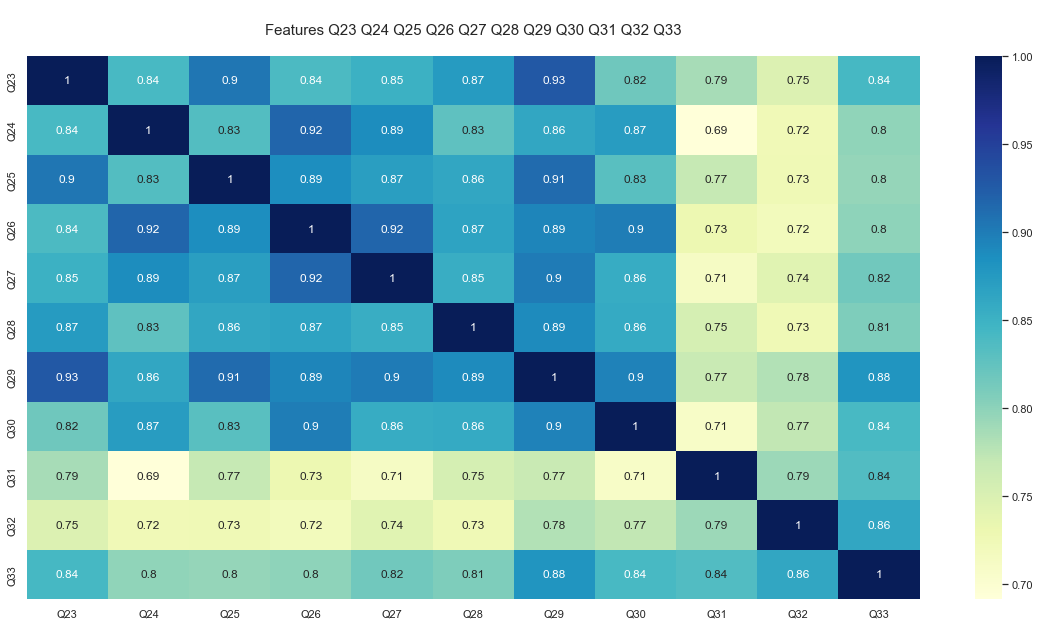

In [16]:
corr=divorce[col_names[22:33]].corr()

sns.set(rc={'figure.figsize':(20,10)})
p=sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        cmap="YlGnBu", annot = True)
p=p.axes.set_title("\n"+"Features "+' '.join([str(elem) for elem in col_names[22:33]])+"\n",fontsize=15)

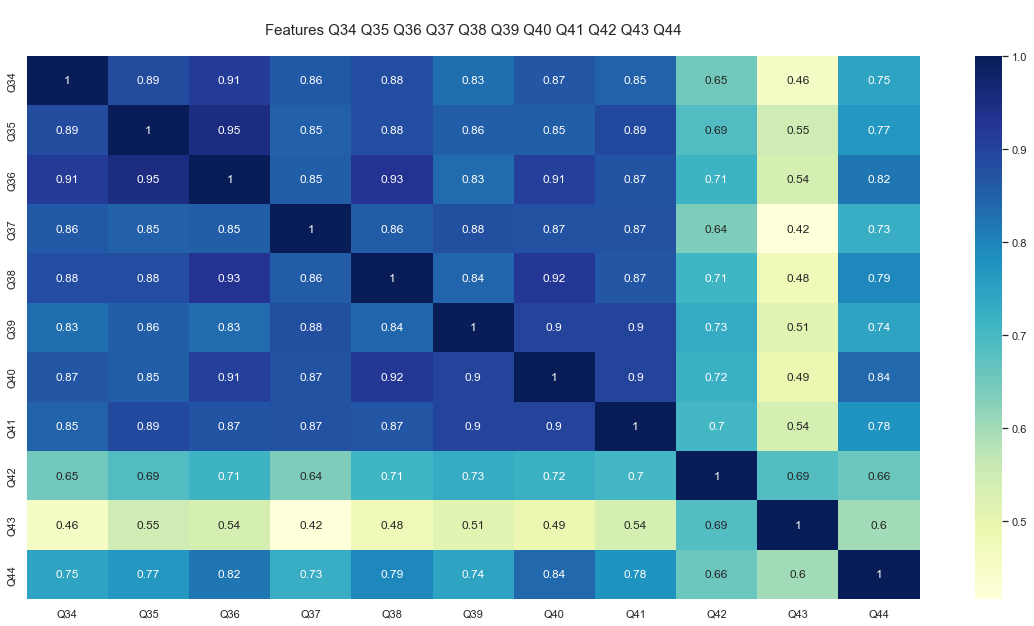

In [17]:
corr=divorce[col_names[33:44]].corr()

sns.set(rc={'figure.figsize':(20,10)})
p=sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        cmap="YlGnBu", annot = True)
p=p.axes.set_title("\n"+"Features "+' '.join([str(elem) for elem in col_names[33:44]])+"\n",fontsize=15);

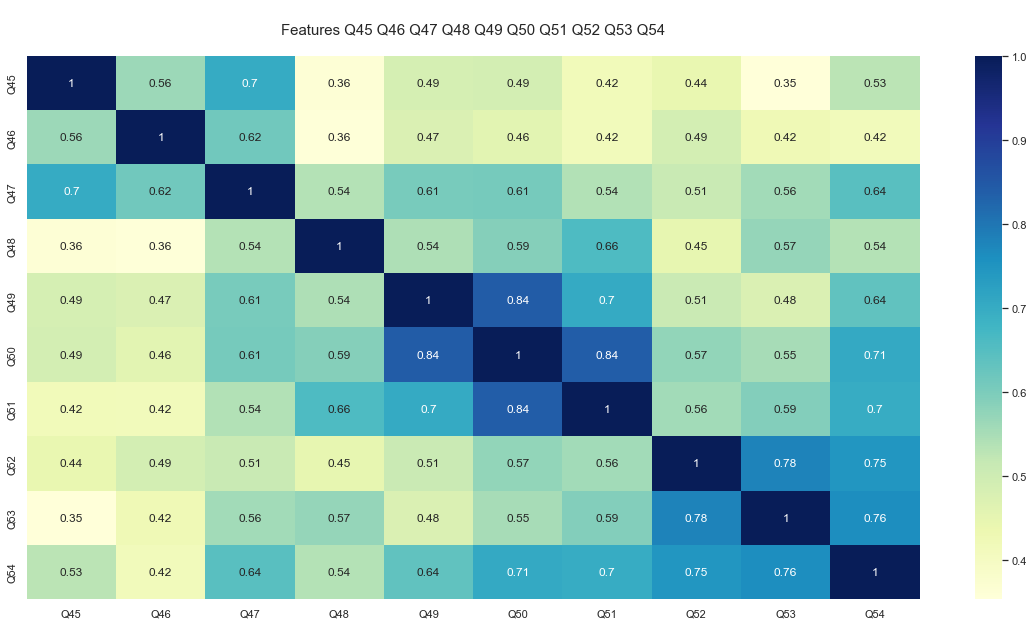

In [18]:
corr=divorce[col_names[44:55]].corr()

sns.set(rc={'figure.figsize':(20,10)})
p=sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        cmap="YlGnBu", annot = True)
p=p.axes.set_title("\n"+"Features "+' '.join([str(elem) for elem in col_names[44:55]])+"\n",fontsize=15);

# find top 10 important questions

In [61]:
corr_dic = {}
for i in divorce.columns:
    corr = divorce[divorce[[i,'Divorce']].columns].corr()
    corr_dic[i] = corr.iloc[0,1]
    
corr_df = pd.DataFrame(corr_dic, index = ['correlation'])
corr_df  = corr_df.T.sort_values('correlation',ascending = False)
corr_df_10 = corr_df.drop('Divorce',axis = 0).iloc[:10,:]

sns.barplot(x=corr_df_10.index,y='correlation',data=corr_df_10)

In [63]:
print(f'top 10 questions correlation is {corr_df_10.index}')

top 10 questions correlation is Index(['Q40', 'Q18', 'Q17', 'Q19', 'Q11', 'Q20', 'Q9', 'Q16', 'Q15', 'Q39'], dtype='object')


C:\Users\User\anaconda3\lib\site-packages\seaborn\axisgrid.py:409: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)


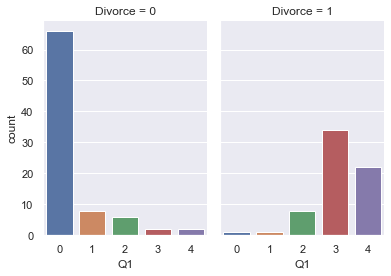

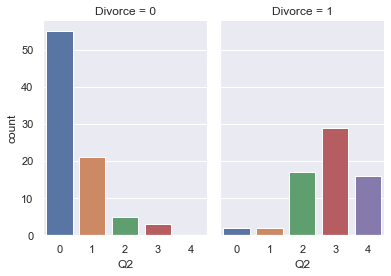

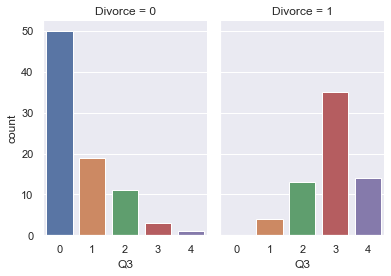

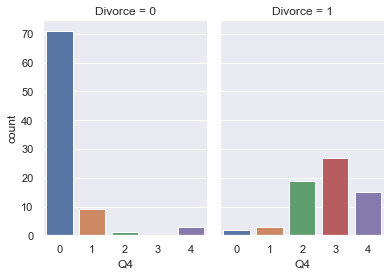

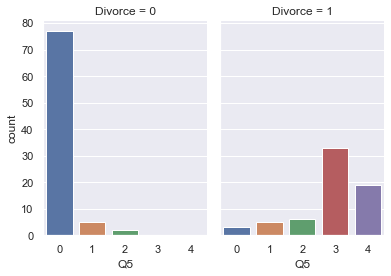

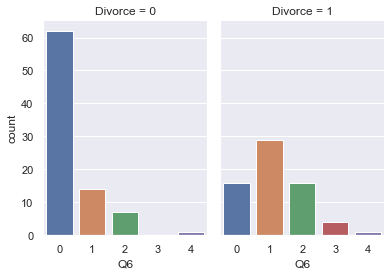

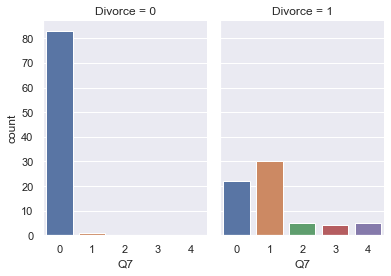

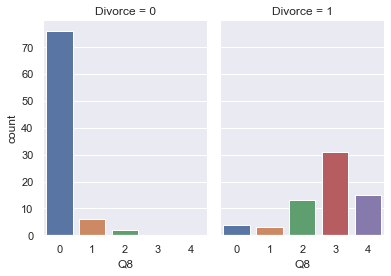

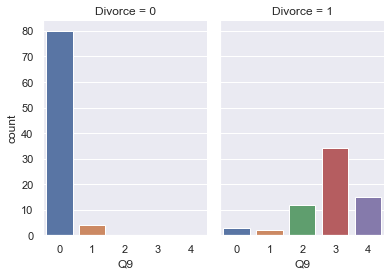

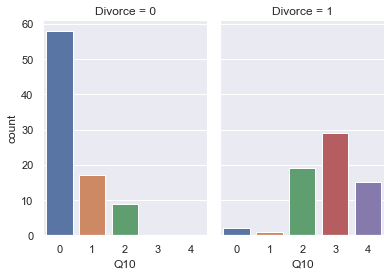

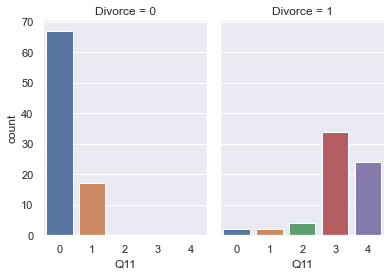

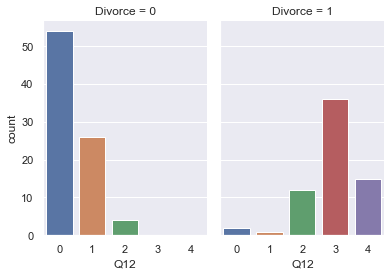

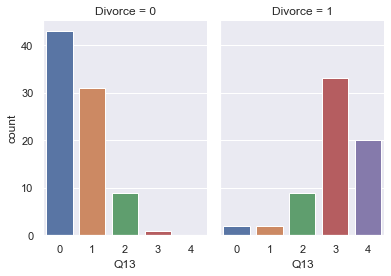

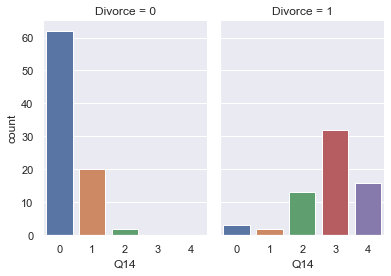

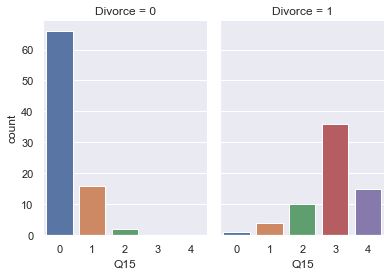

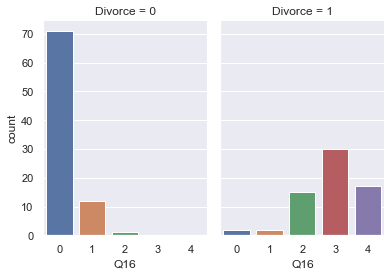

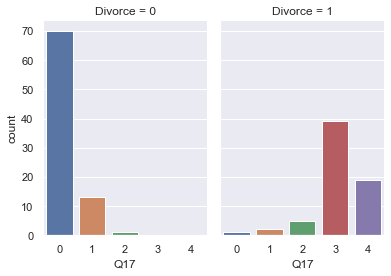

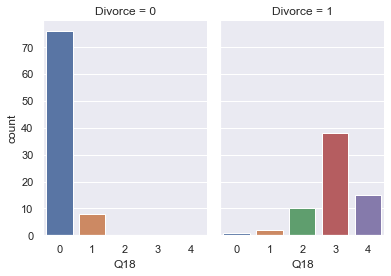

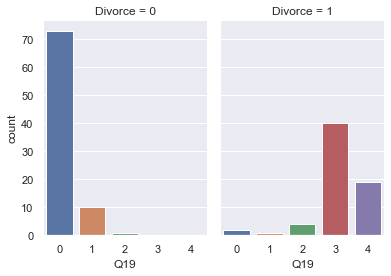

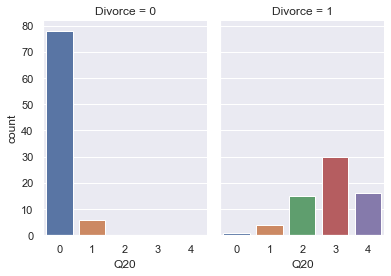

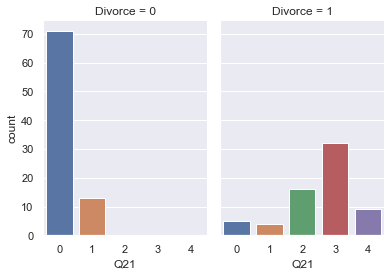

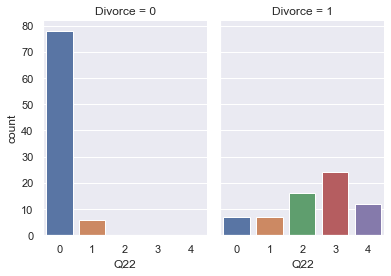

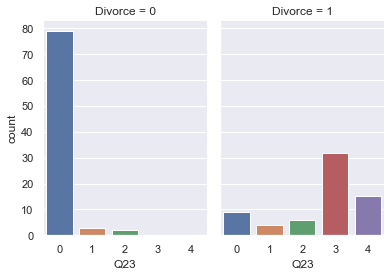

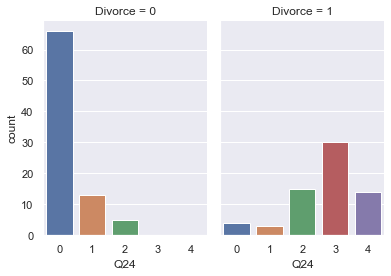

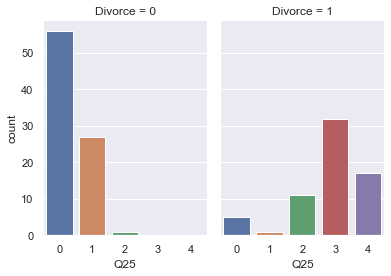

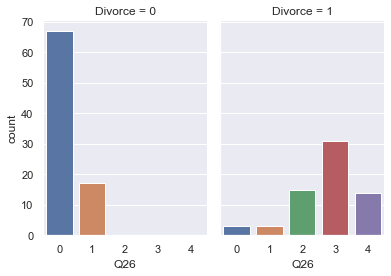

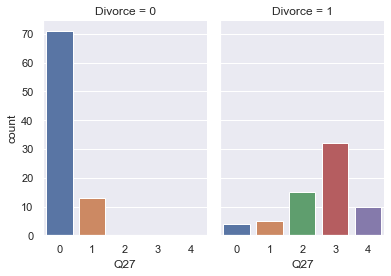

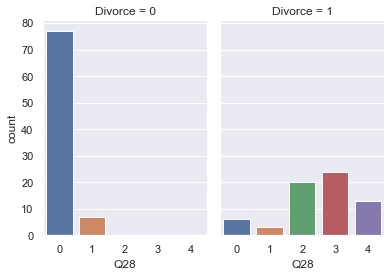

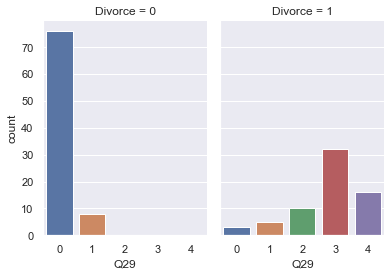

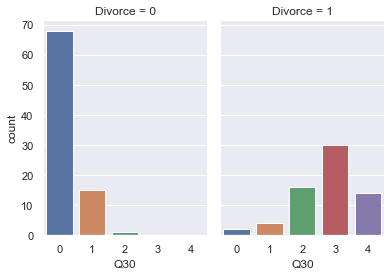

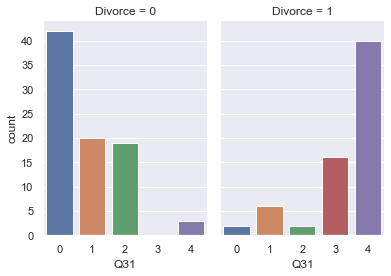

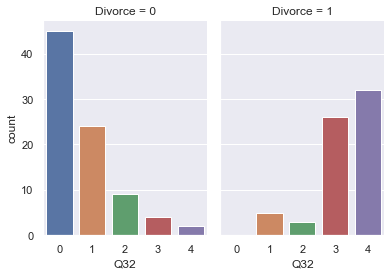

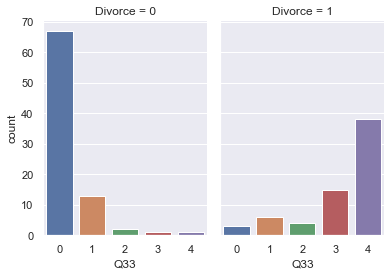

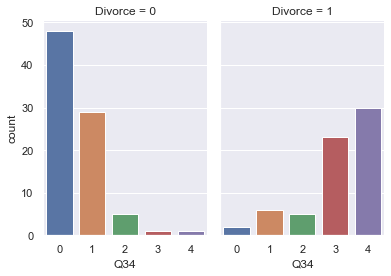

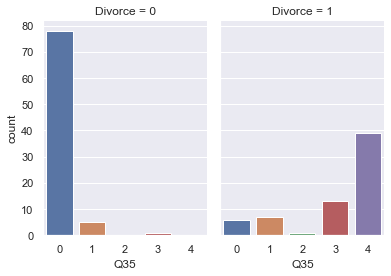

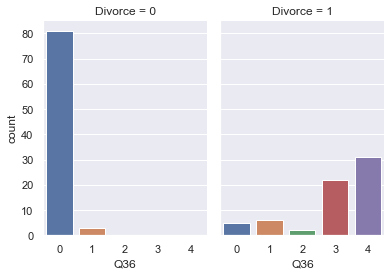

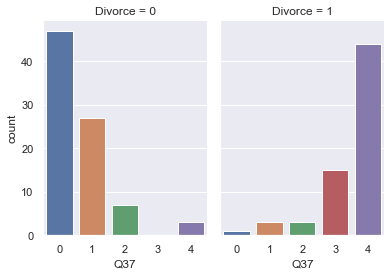

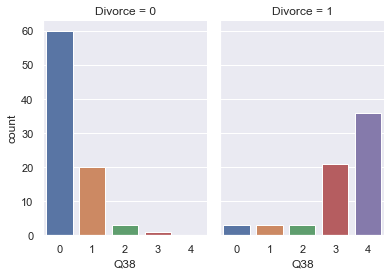

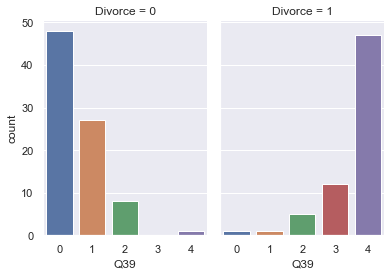

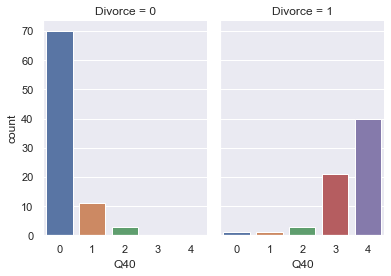

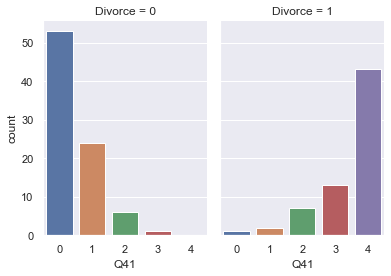

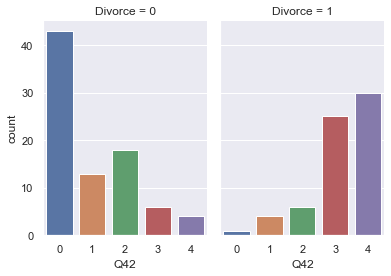

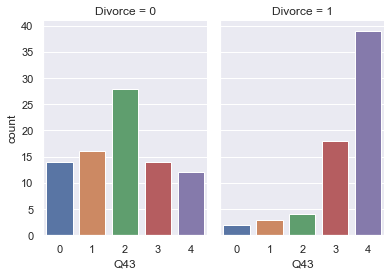

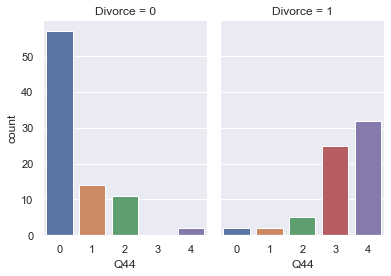

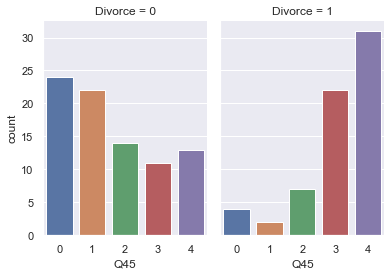

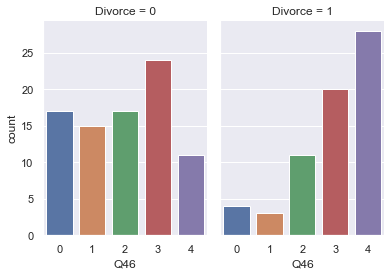

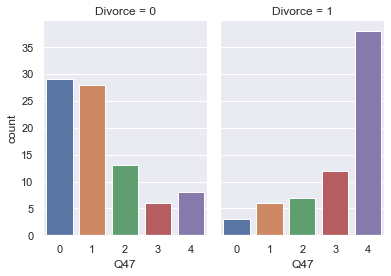

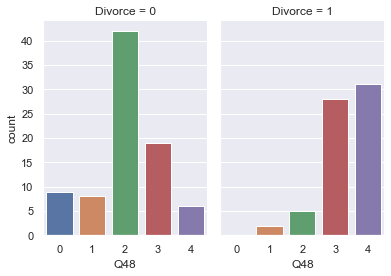

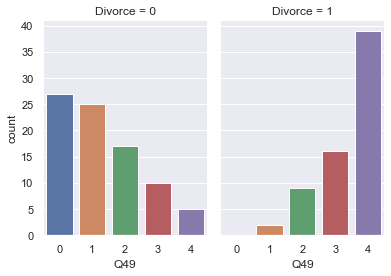

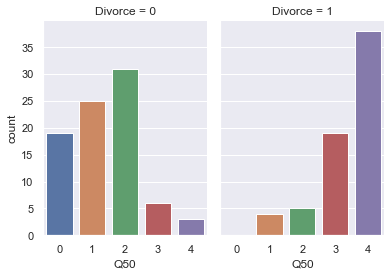

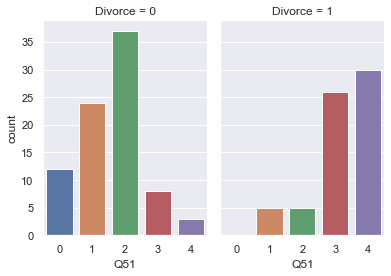

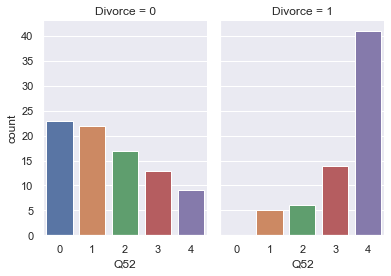

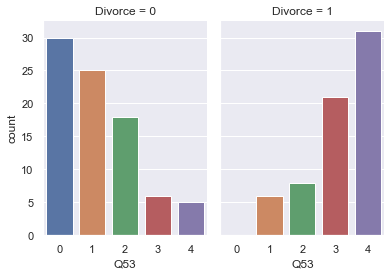

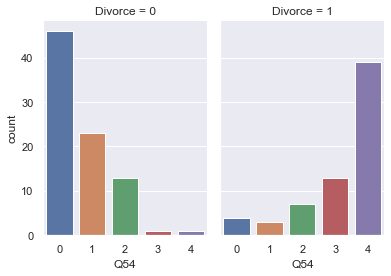

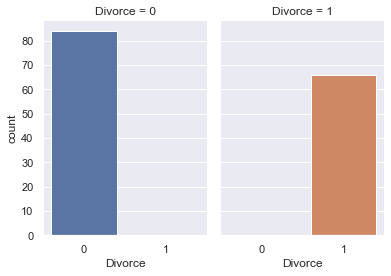

In [21]:
for i in divorce.columns:
    
    sns.catplot(x=i, col="Divorce",
                    data=divorce, kind="count",
                    height=4, aspect=.7)

In [22]:
divorce['Q1'].value_counts(normalize=True)

0    0.446667
3    0.240000
4    0.160000
2    0.093333
1    0.060000
Name: Q1, dtype: float64

In [23]:
def percent_dis_q_divorce(i):
    x,y = i, 'Divorce'

    df1 = divorce.groupby(x)[y].value_counts(normalize=True)
    df1 = df1.mul(100)
    df1 = df1.rename('percent').reset_index()

    sns.catplot(x=x,y='percent',col = y,kind='bar',data=df1).fig.suptitle('perrcent dist of ' + i +" with Divorce")

def dis_q_divorce(i):
    sns.catplot(x=i, col="Divorce",data=divorce, kind="count").fig.suptitle('dist of ' + i +" with Divorce")

def percnt_dist_people_across_q(i):
    sns.histplot(x = divorce[i], hue=divorce['Divorce'], multiple="dodge", stat = 'probability',discrete =True,shrink = 0.8, common_norm=False)

x,y = "Q2", 'Divorce'

df1 = divorce.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()
df1

C:\Users\User\anaconda3\lib\site-packages\seaborn\axisgrid.py:409: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)


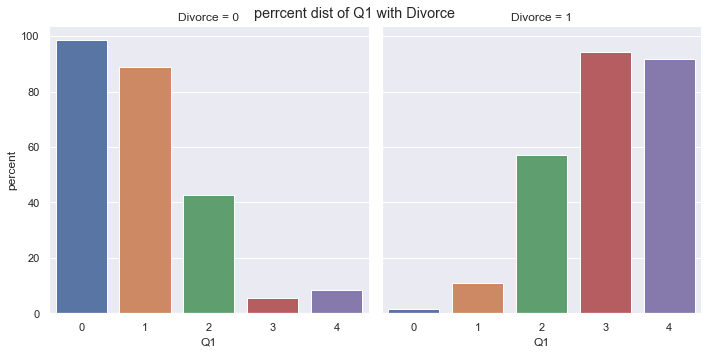

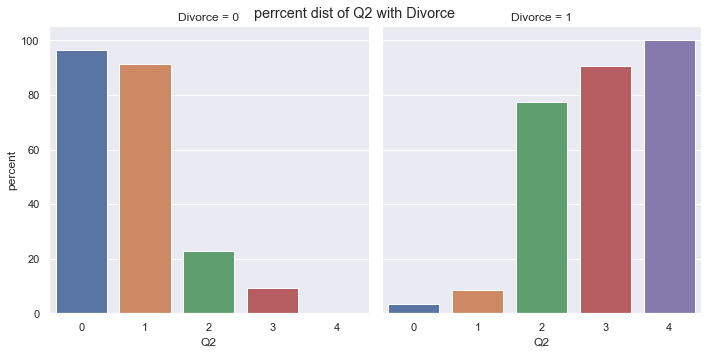

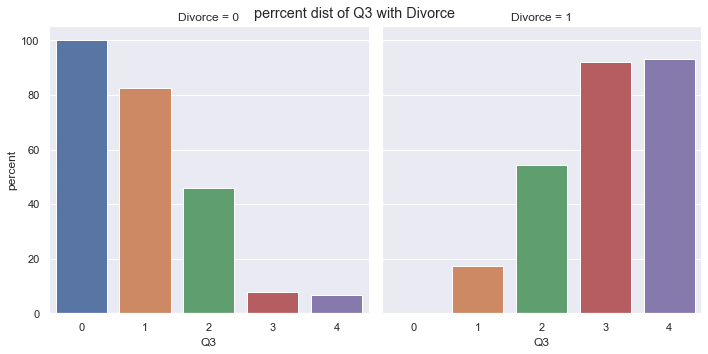

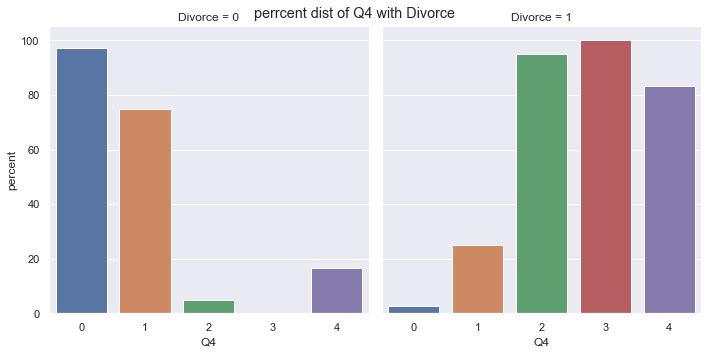

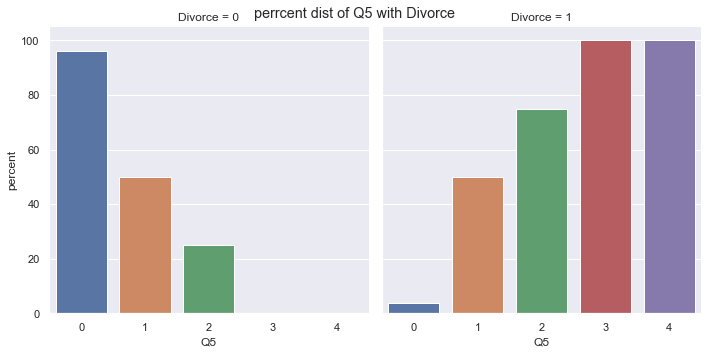

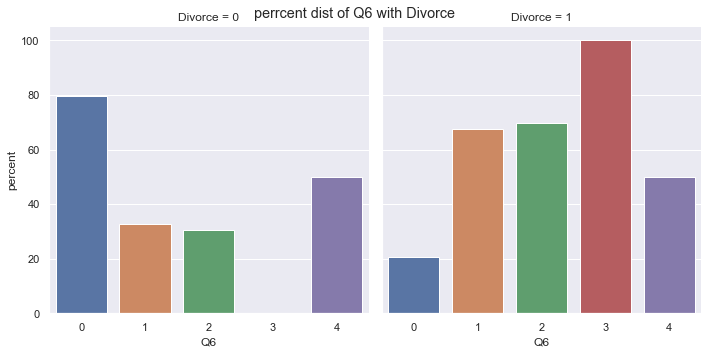

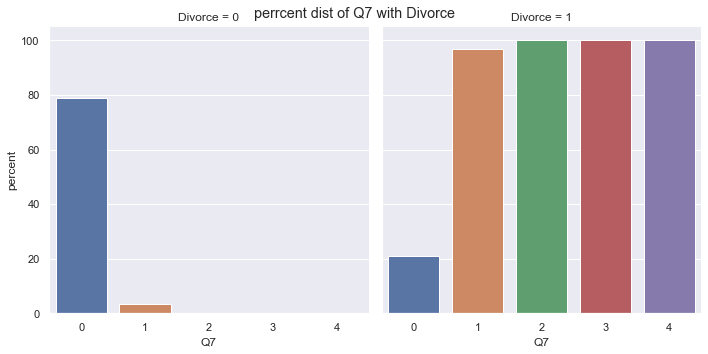

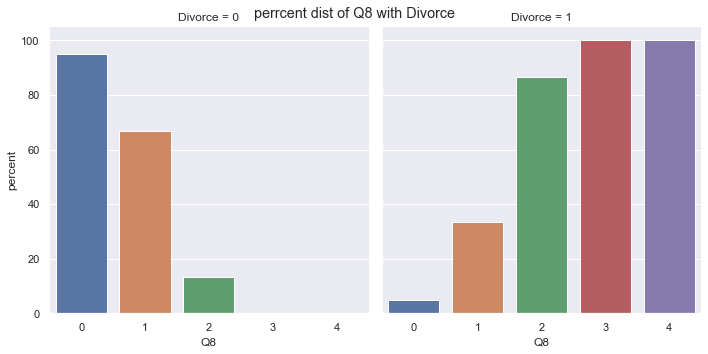

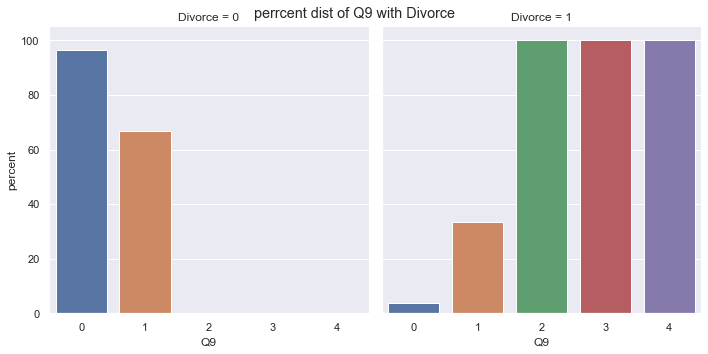

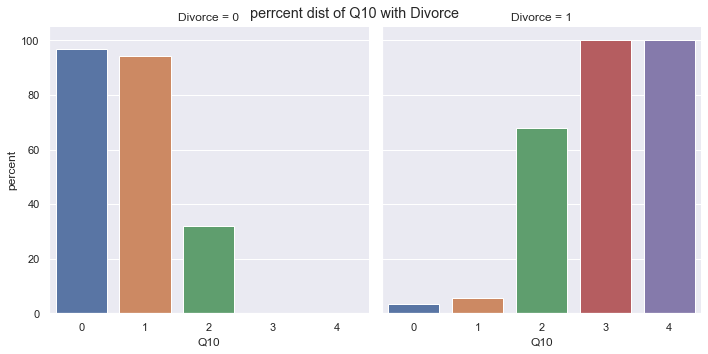

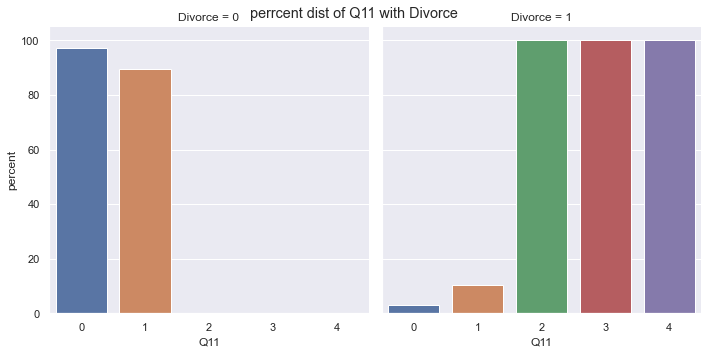

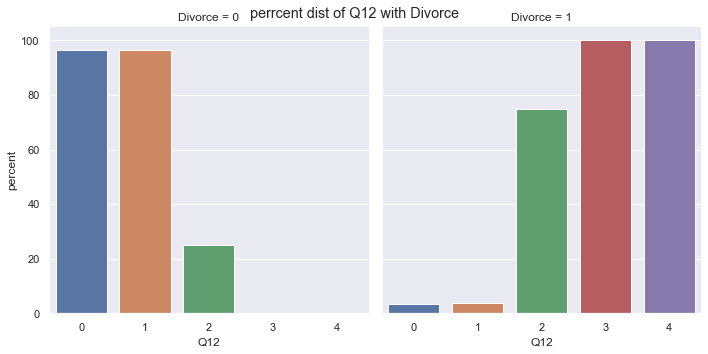

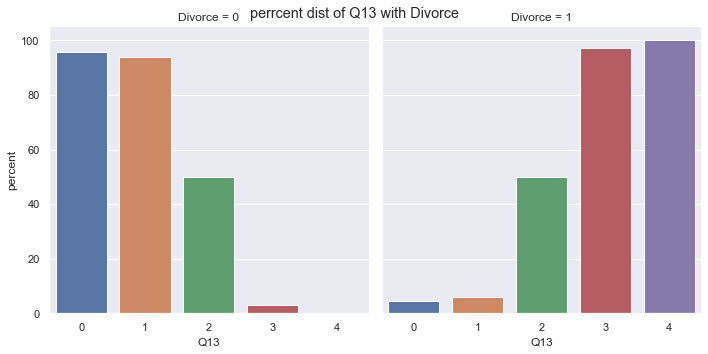

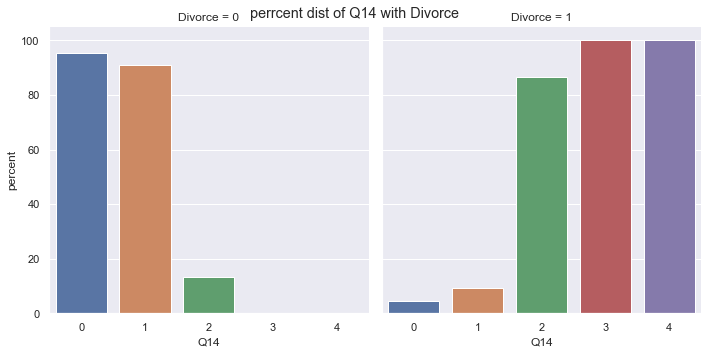

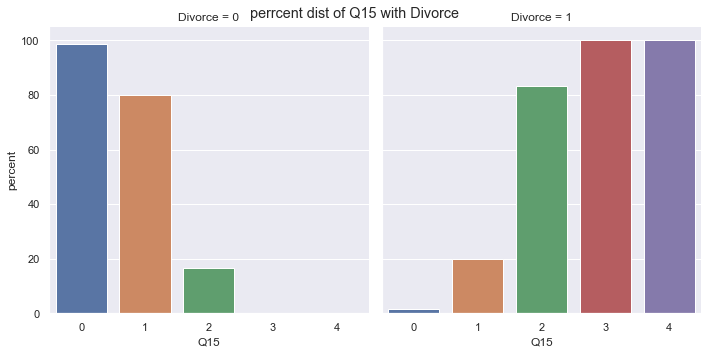

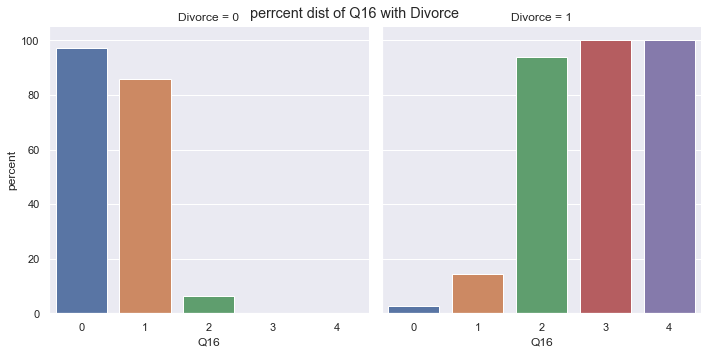

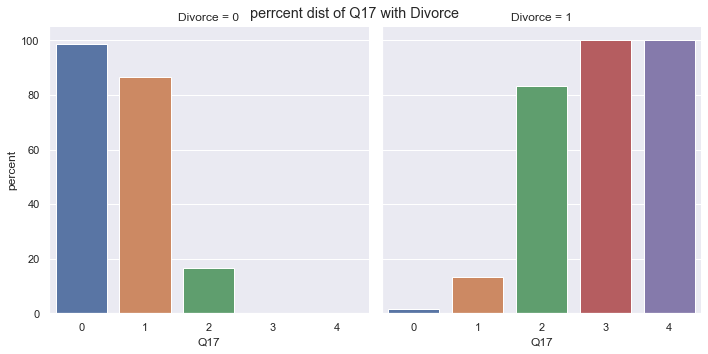

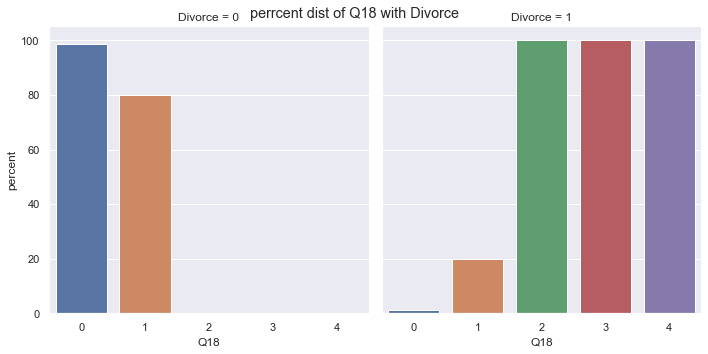

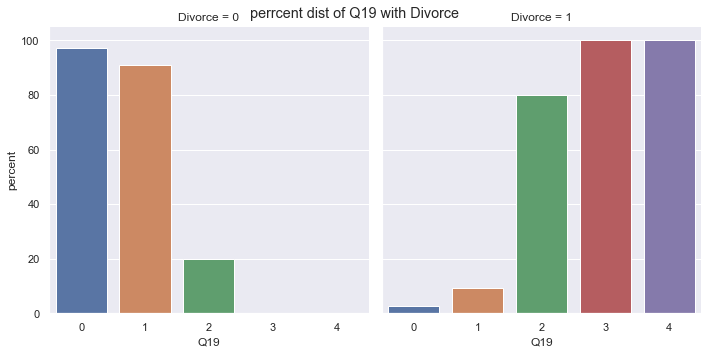

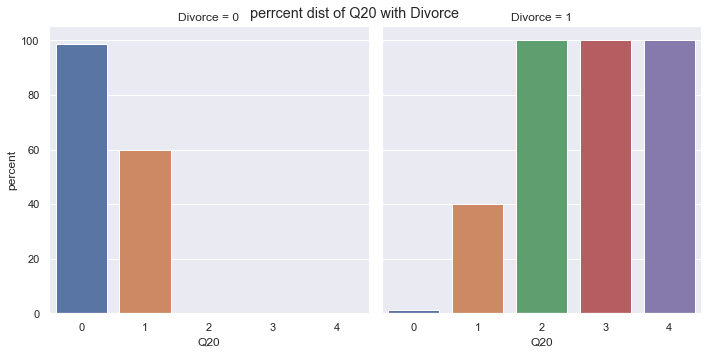

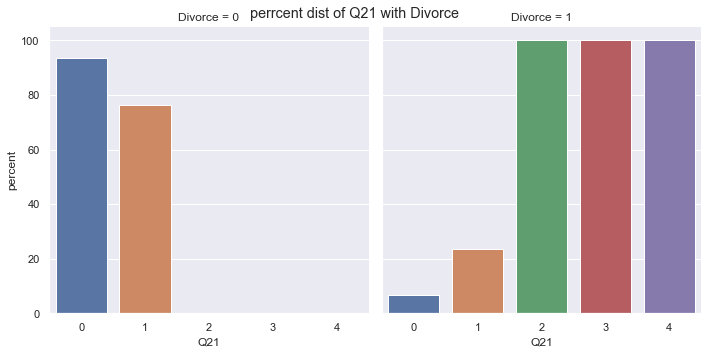

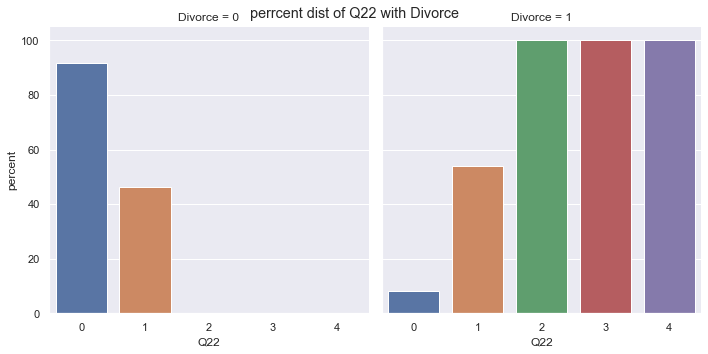

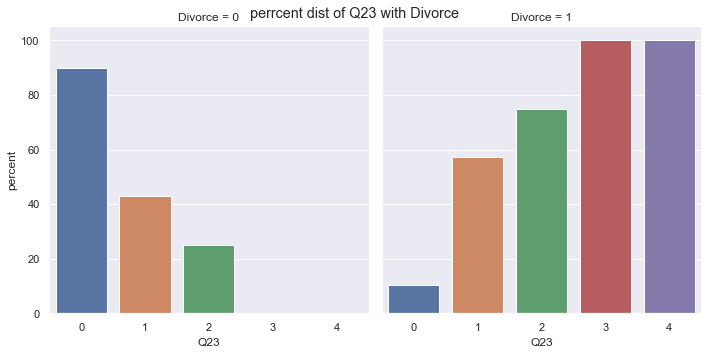

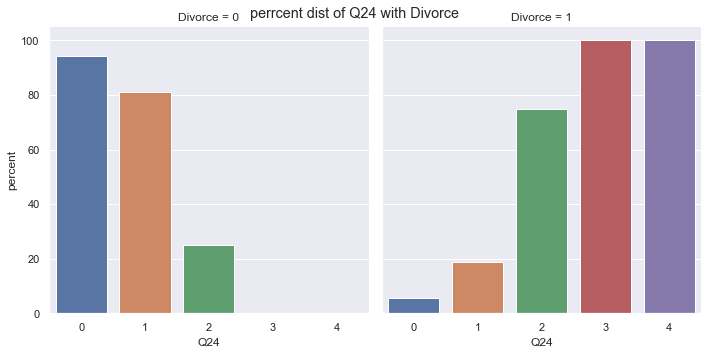

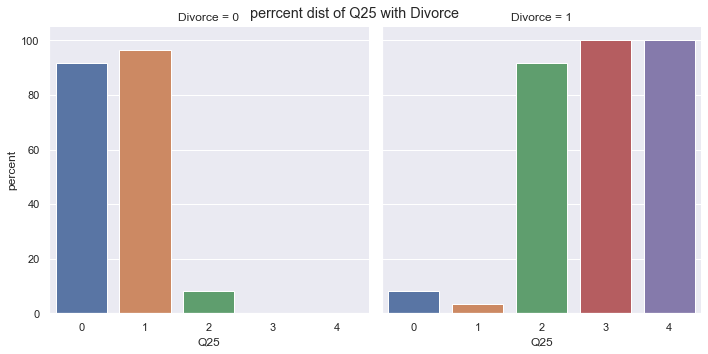

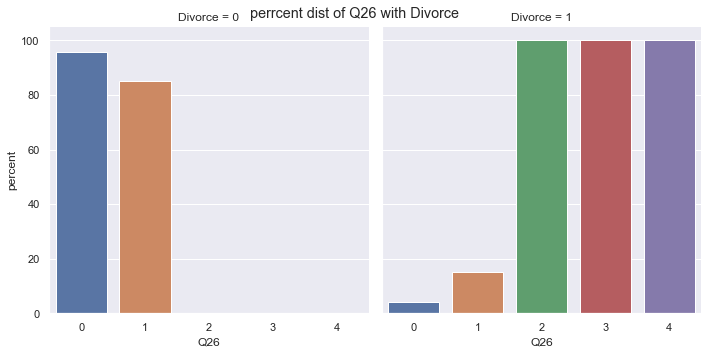

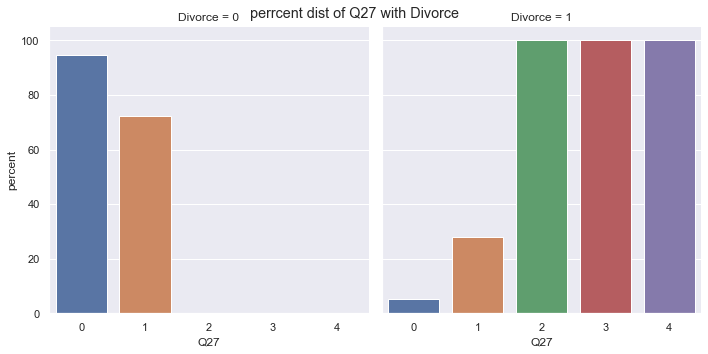

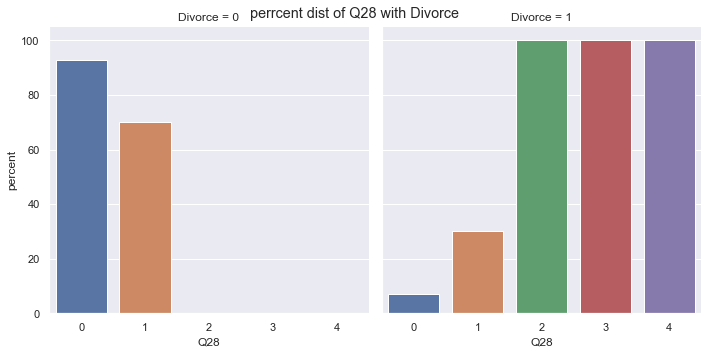

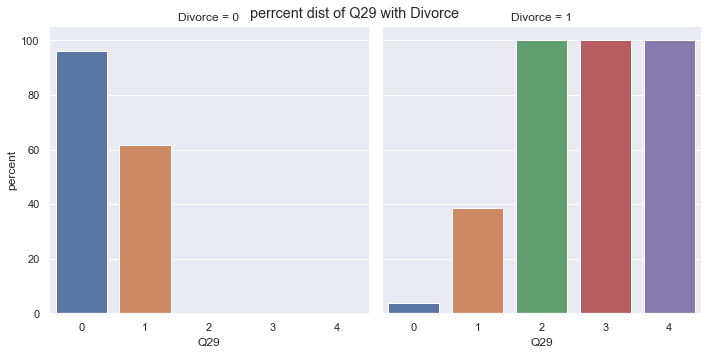

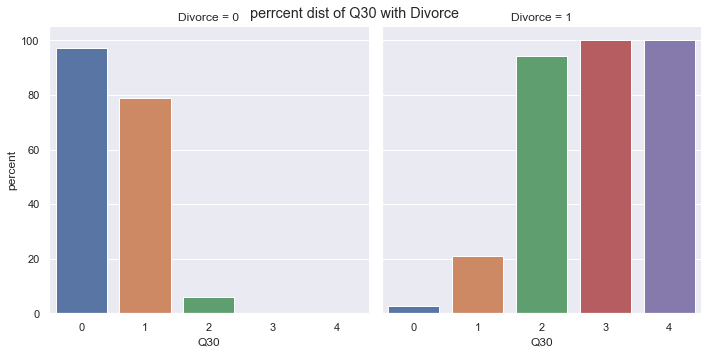

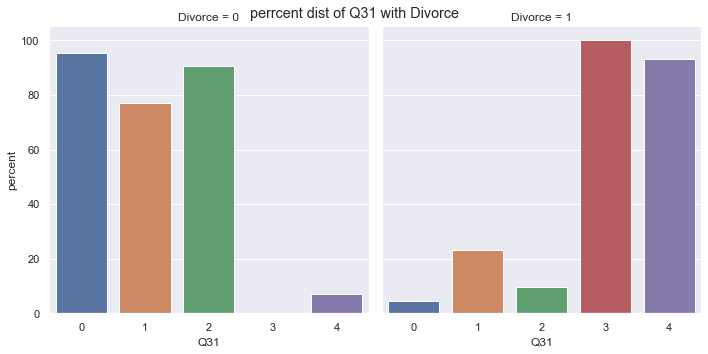

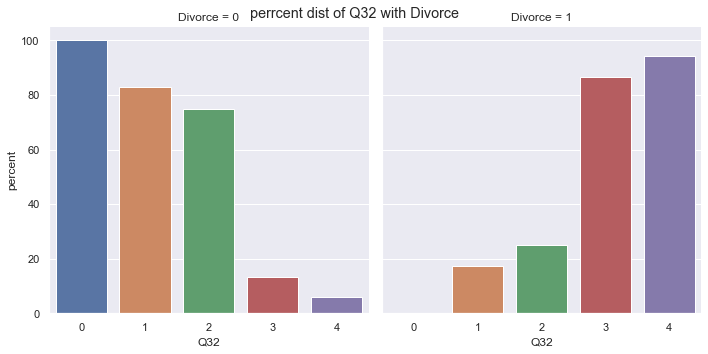

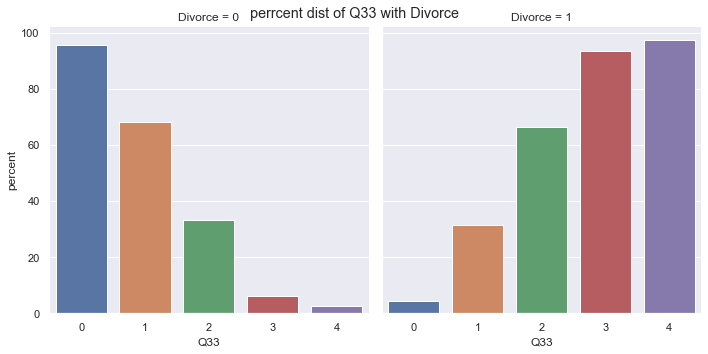

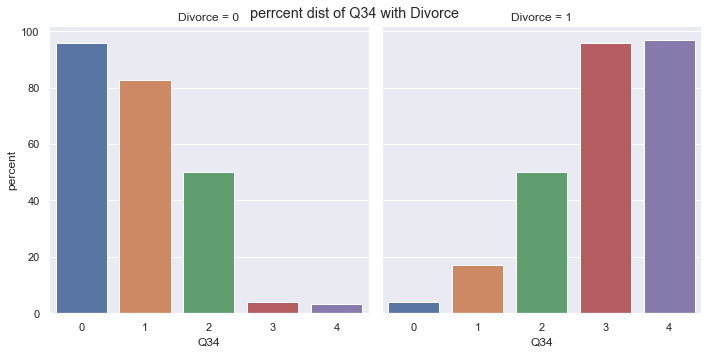

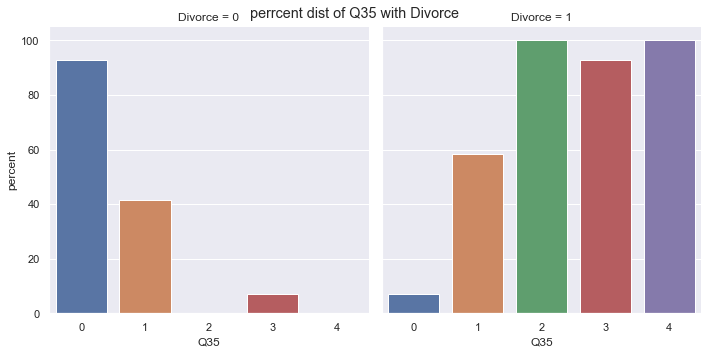

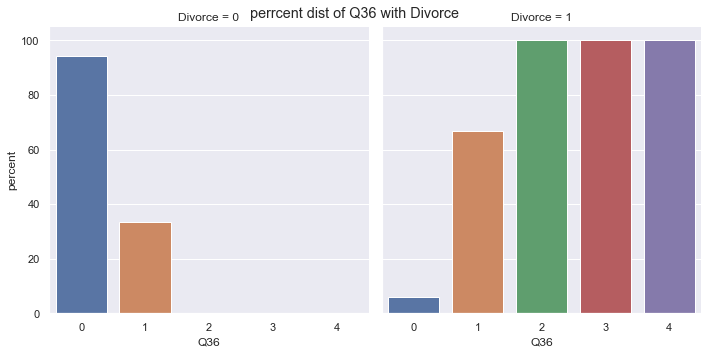

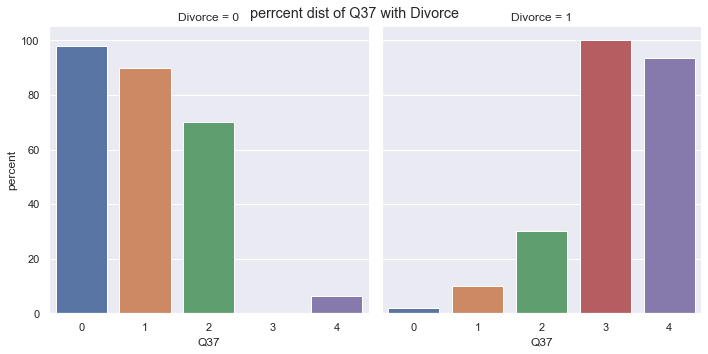

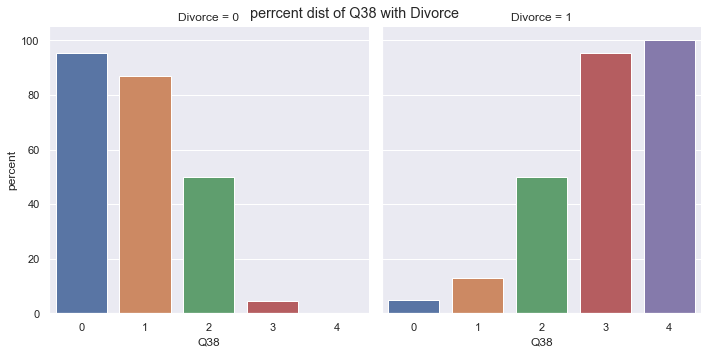

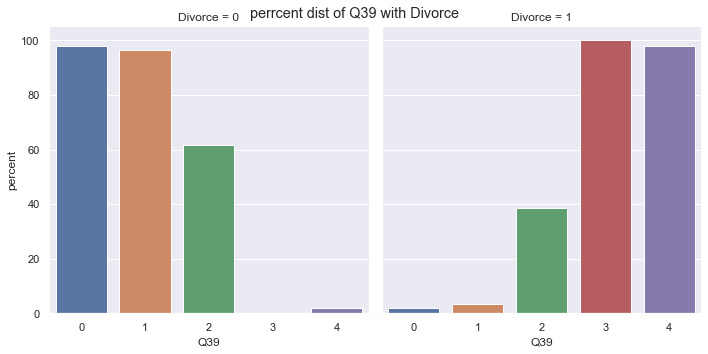

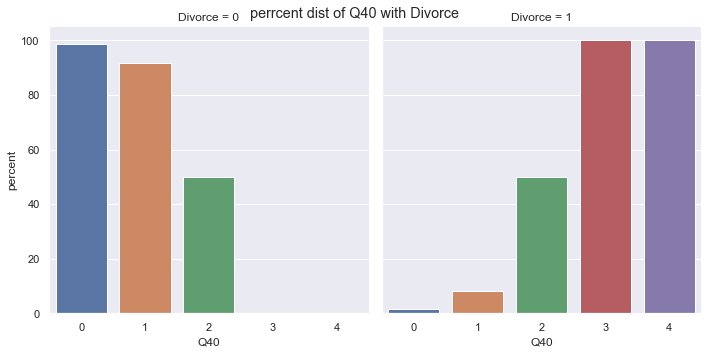

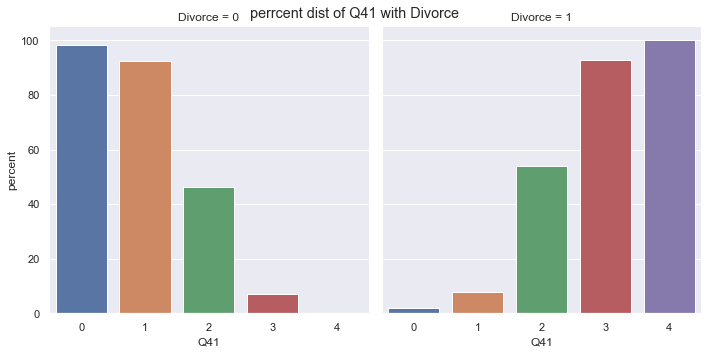

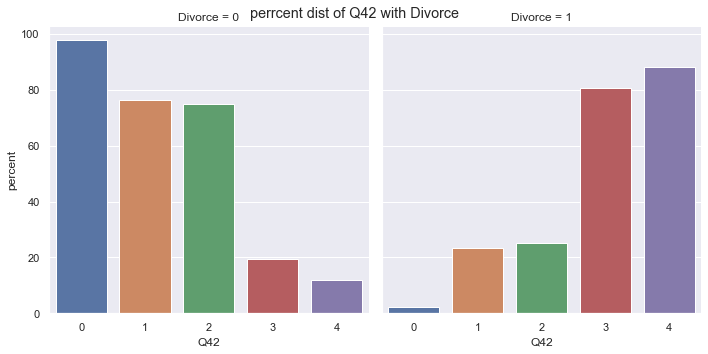

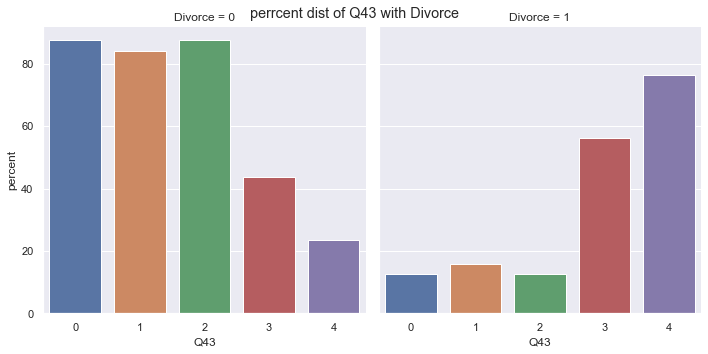

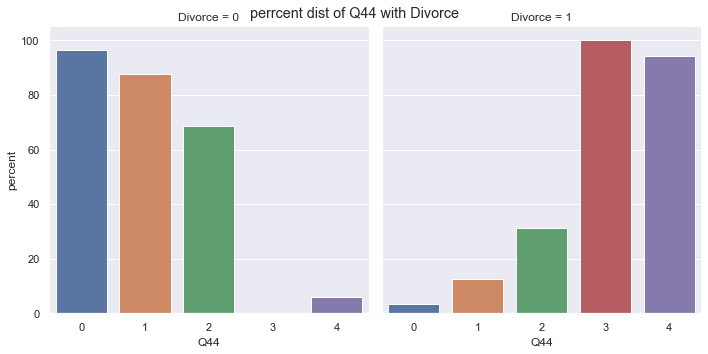

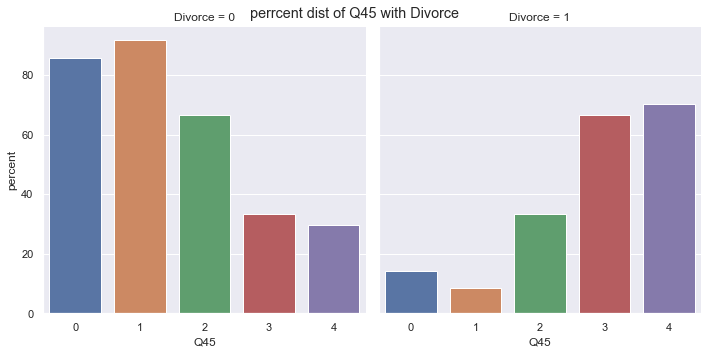

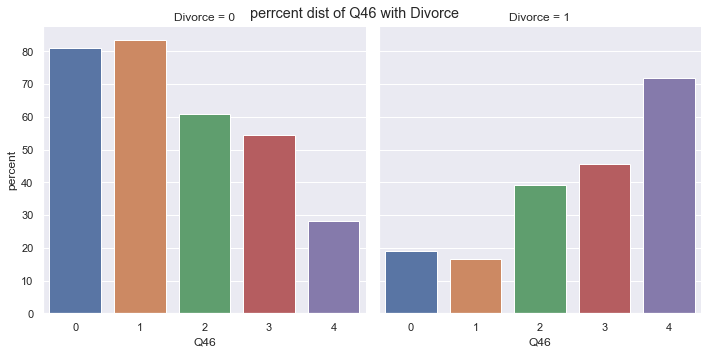

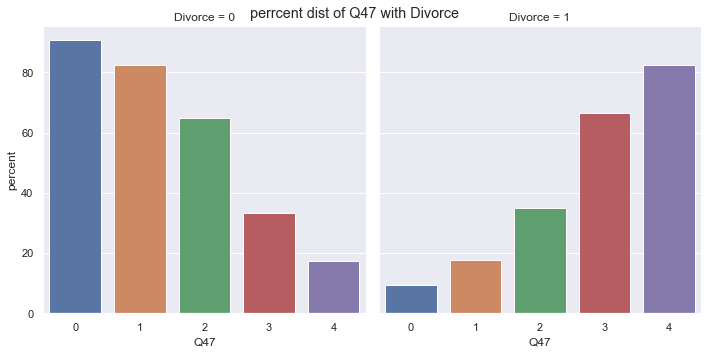

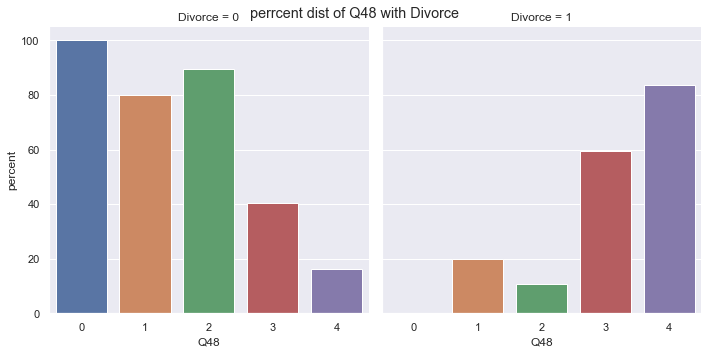

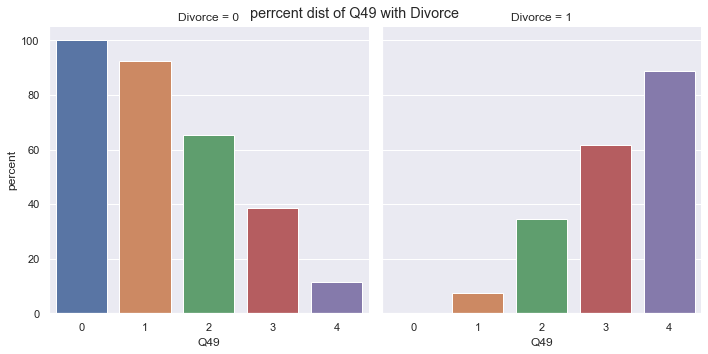

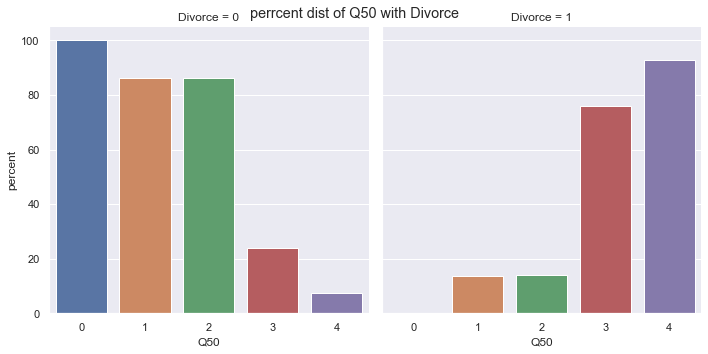

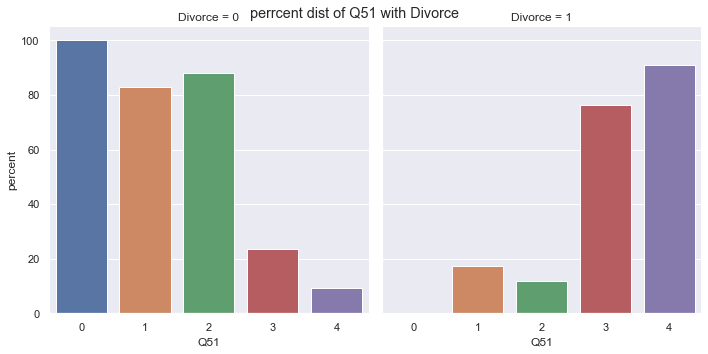

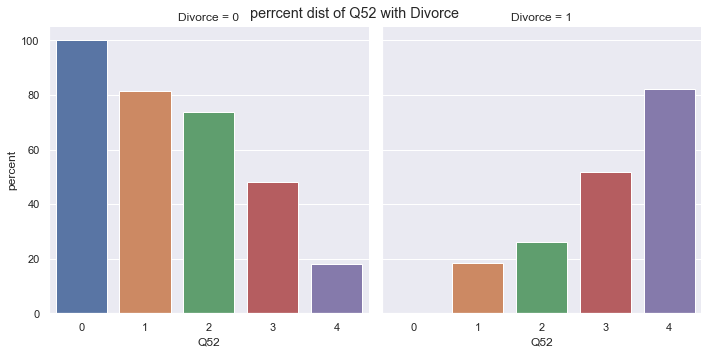

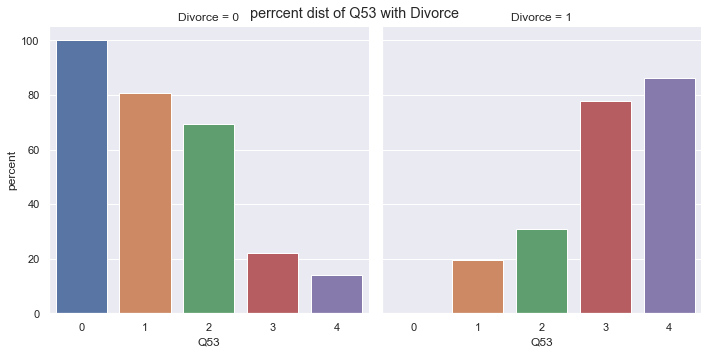

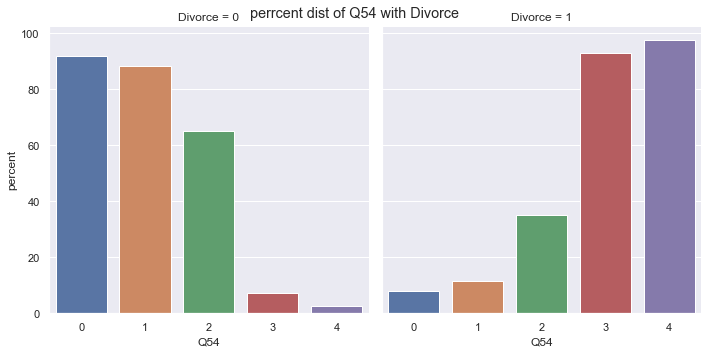

In [24]:
for i in divorce.drop('Divorce',axis = 1).columns:
    percent_dis_q_divorce(i)

In [25]:
#getting questions where only divorcees anwser with 3$4
val_q = {}
for i in divorce.drop('Divorce',axis = 1).columns:
    x,y = i, 'Divorce'

    df1 = divorce.groupby(x)[y].value_counts(normalize=True)
    df1 = df1.mul(100)
    df1 = df1.rename('percent').reset_index()
    val_q[i] = df1[i].count()
    
Q_with_def_ans = [k for k,v in val_q.items() if v <9]

In [33]:
print(f'from the observation it is seen that questions {Q_with_def_ans} had only divorces anwser with number 3 or 4')

from the observation it is seen that questions ['Q5', 'Q7', 'Q8', 'Q9', 'Q10', 'Q11', 'Q12', 'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q19', 'Q20', 'Q21', 'Q22', 'Q23', 'Q24', 'Q25', 'Q26', 'Q27', 'Q28', 'Q29', 'Q30', 'Q35', 'Q36', 'Q40'] had only divorces anwser with number 3 or 4


qeustions ['Q5', 'Q7', 'Q8', 'Q9', 'Q10', 'Q11', 'Q12', 'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q19', 'Q20', 'Q21', 'Q22', 'Q23', 'Q24', 'Q25', 'Q26', 'Q27', 'Q28', 'Q29', 'Q30', 'Q35', 'Q36', 'Q40'] should be seen as important

In [54]:
#how questions relate to divorce and each other
#sns.scatterplot(x= divorce['Q40'], y=divorce["Q5"],hue = divorce["Divorce"])

C:\Users\User\anaconda3\lib\site-packages\seaborn\axisgrid.py:409: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)


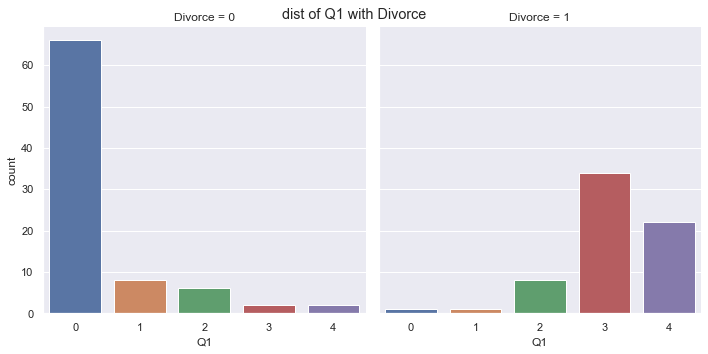

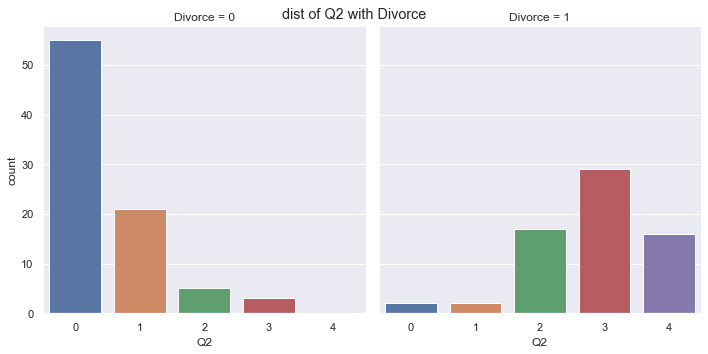

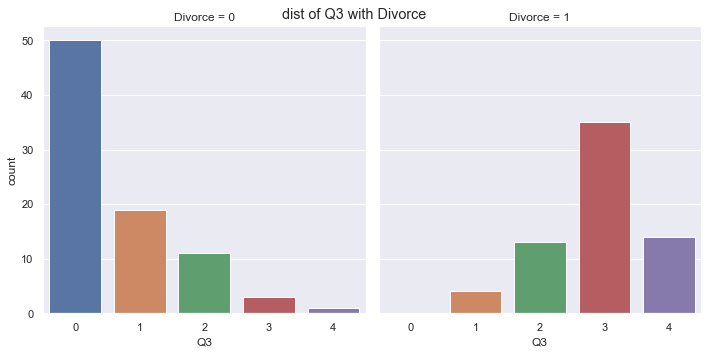

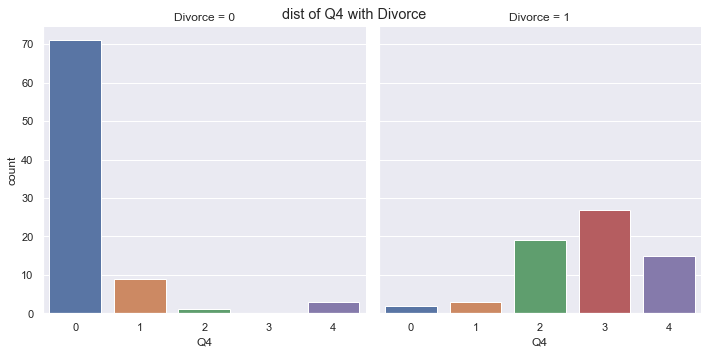

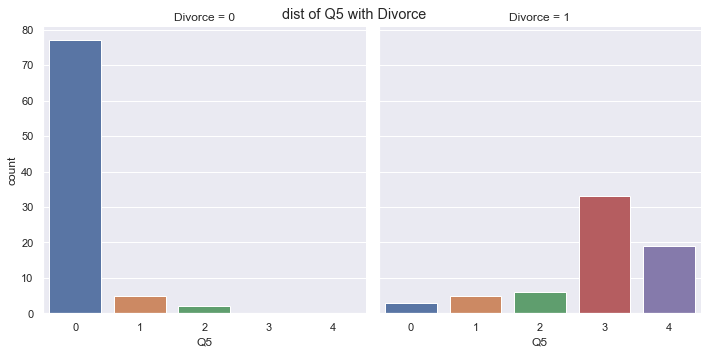

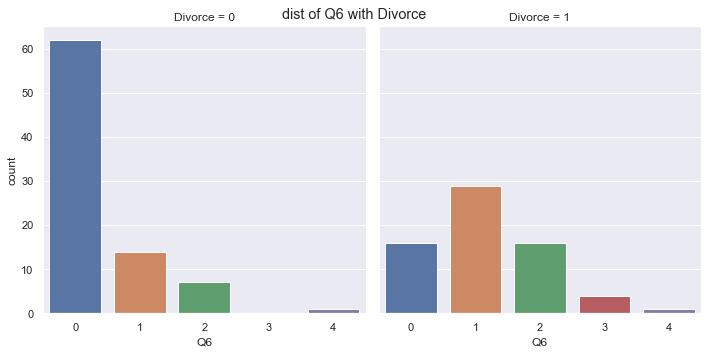

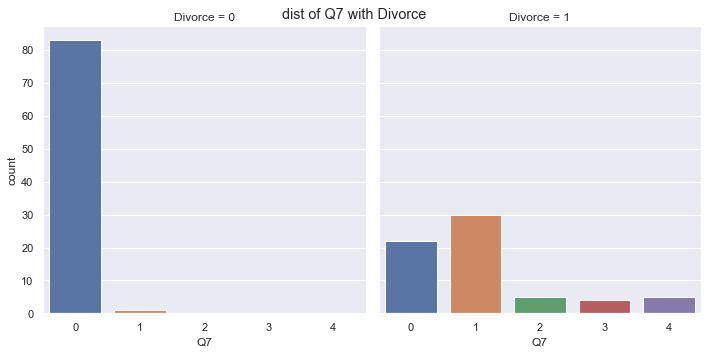

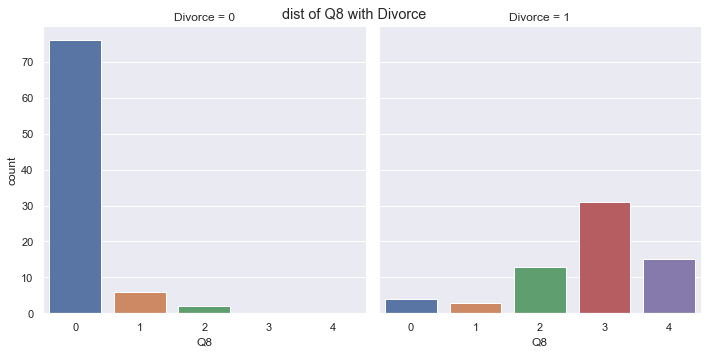

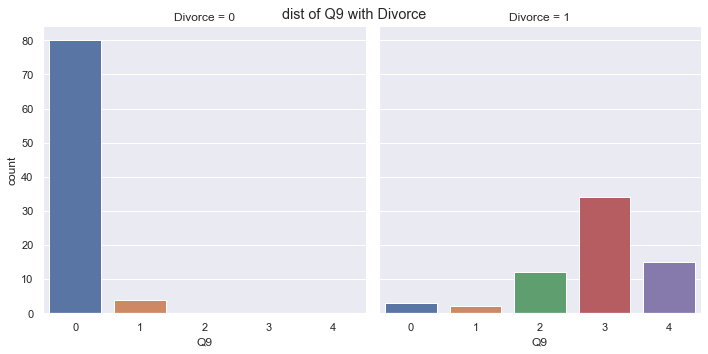

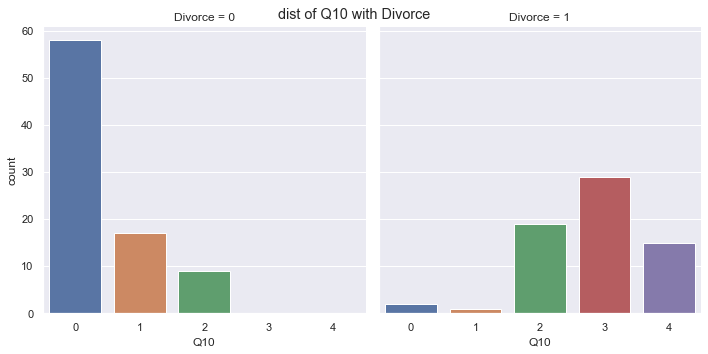

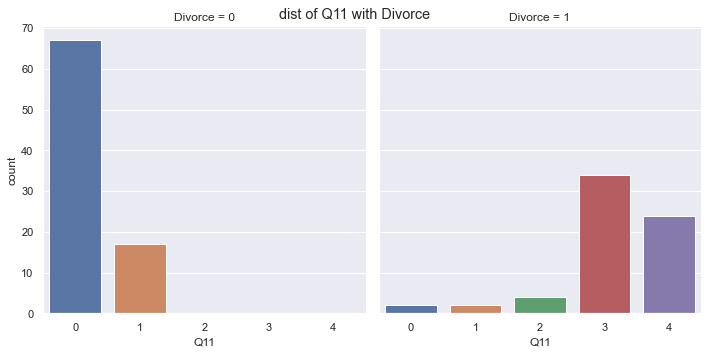

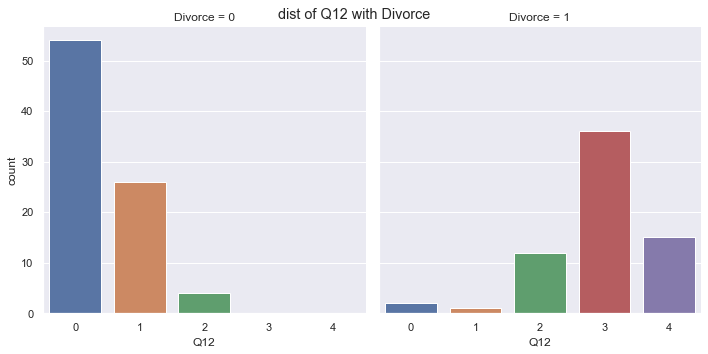

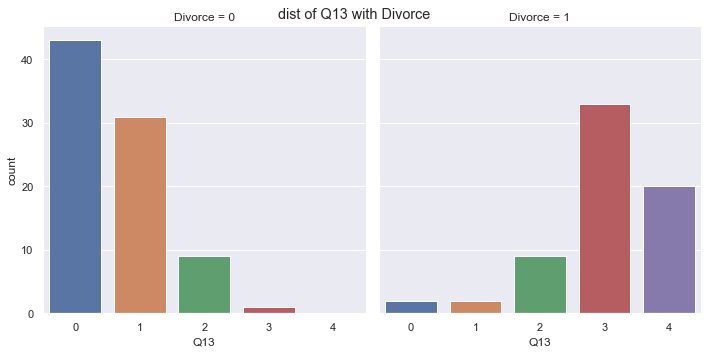

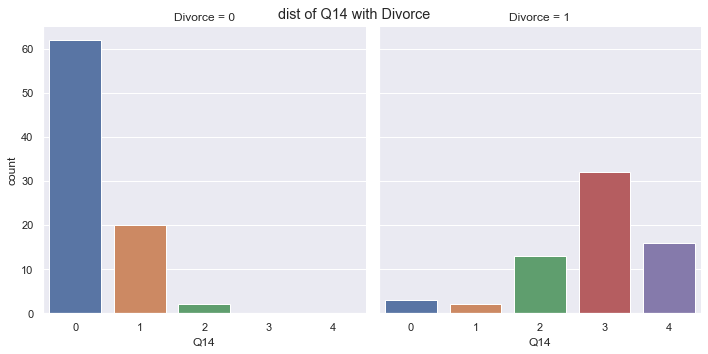

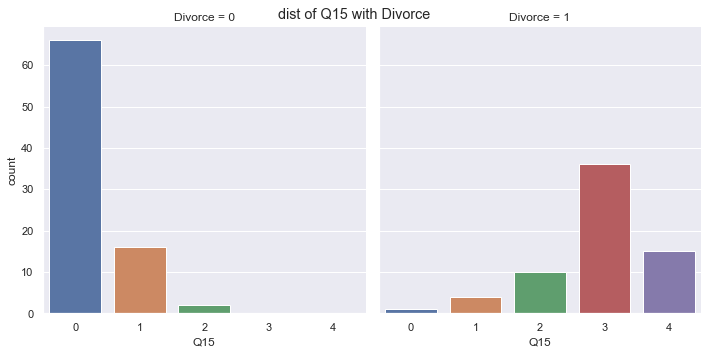

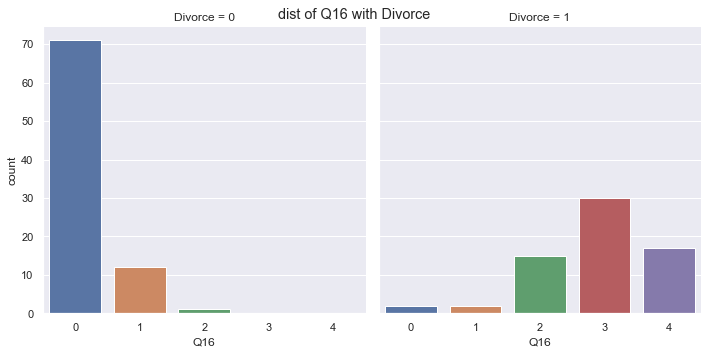

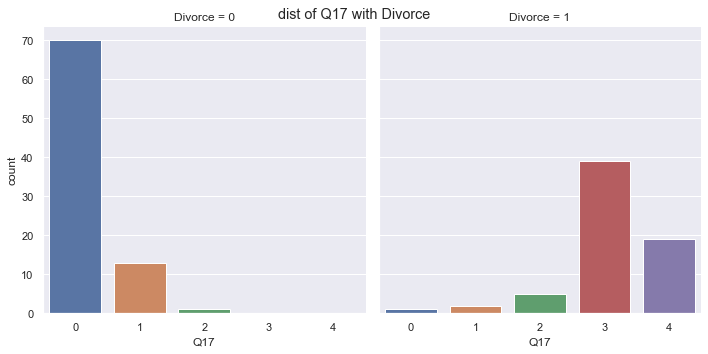

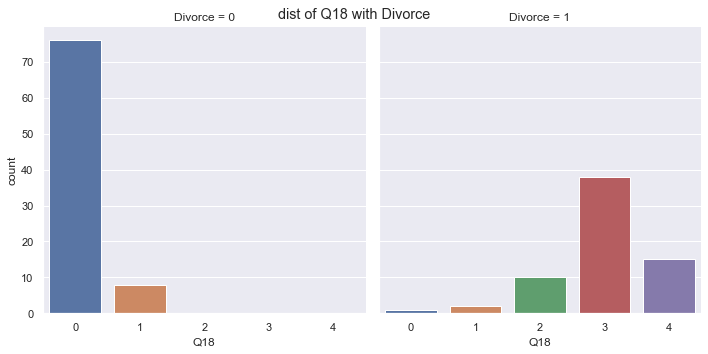

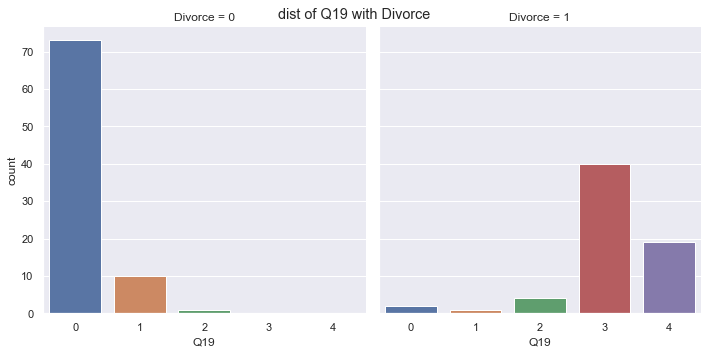

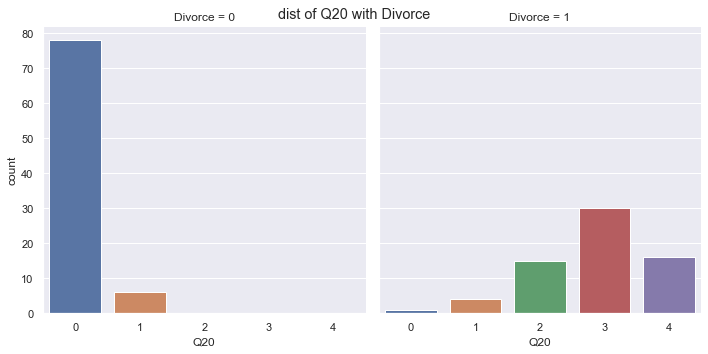

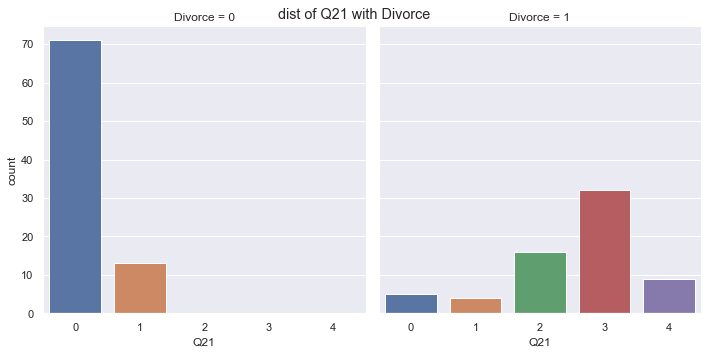

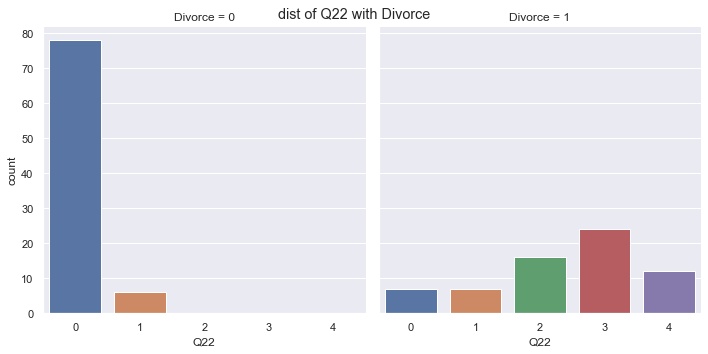

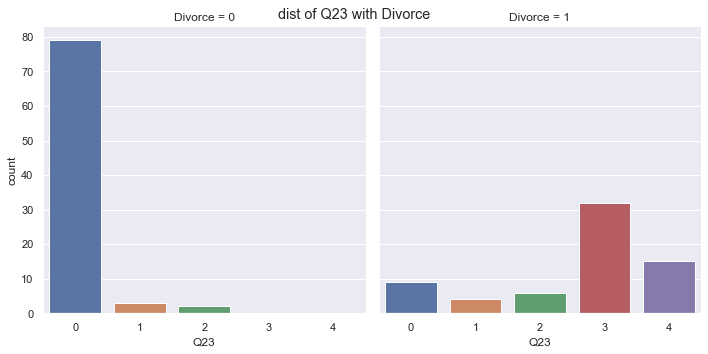

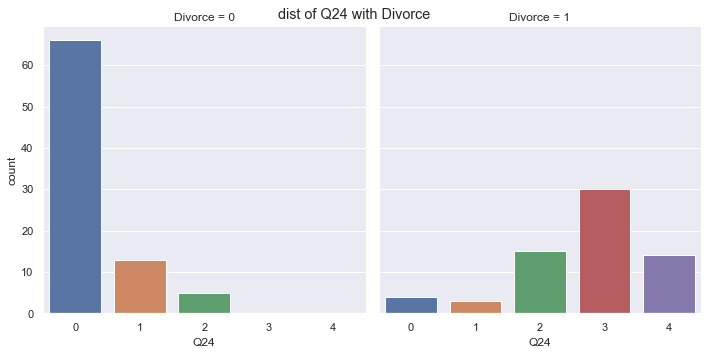

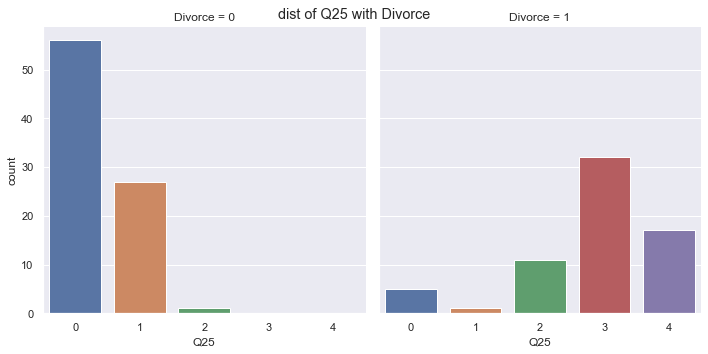

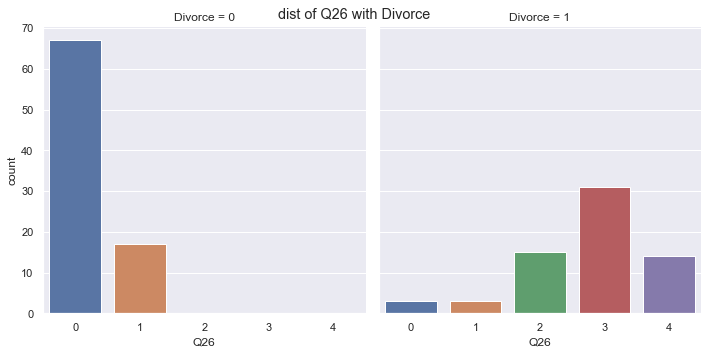

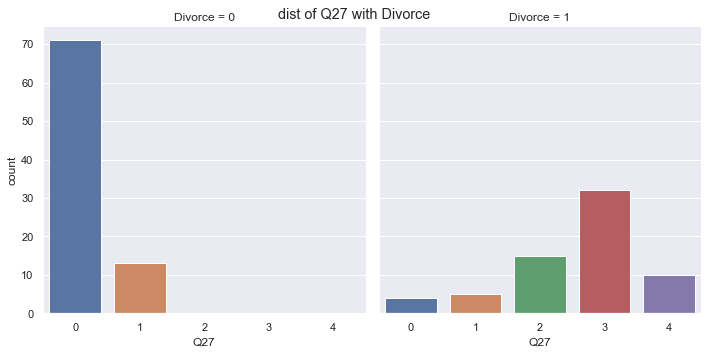

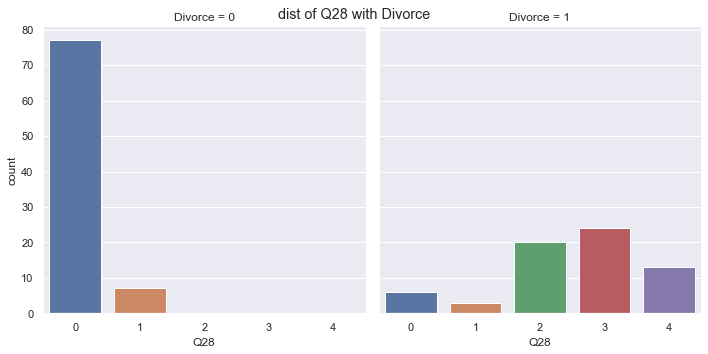

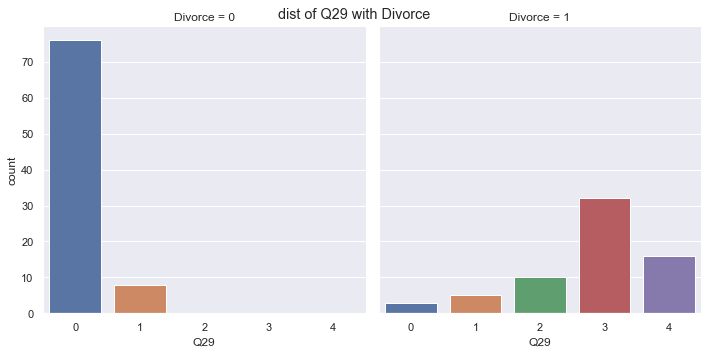

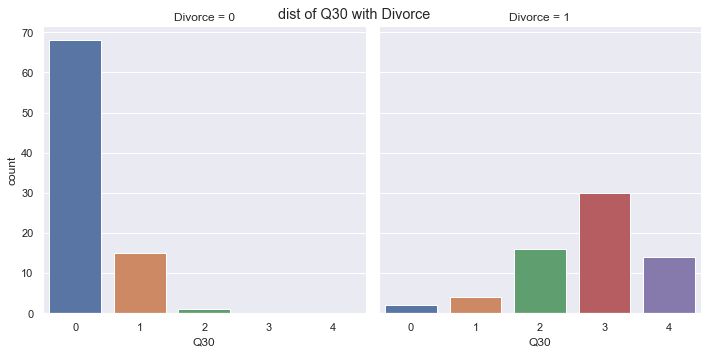

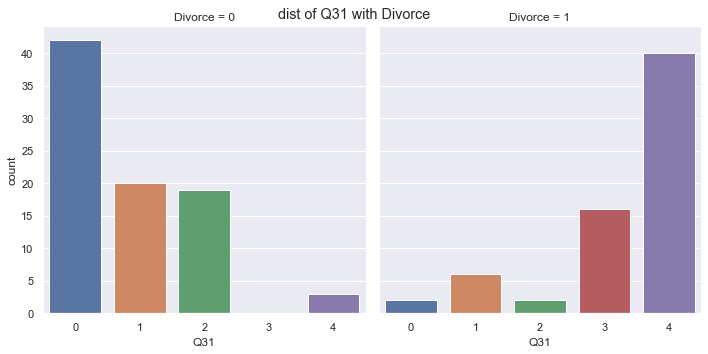

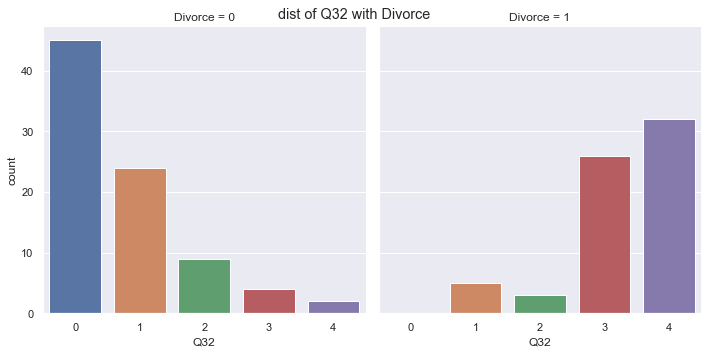

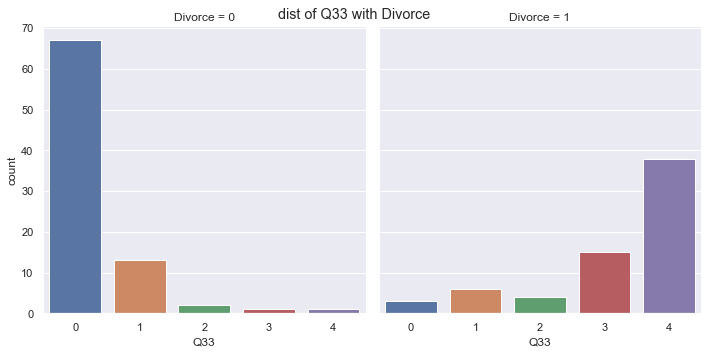

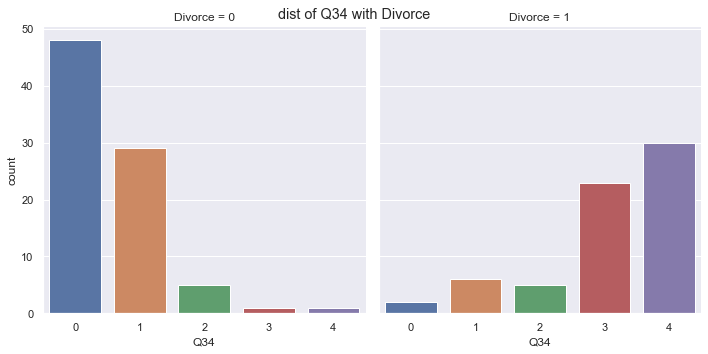

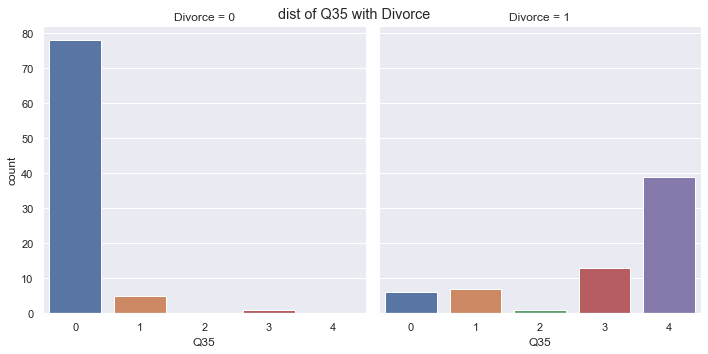

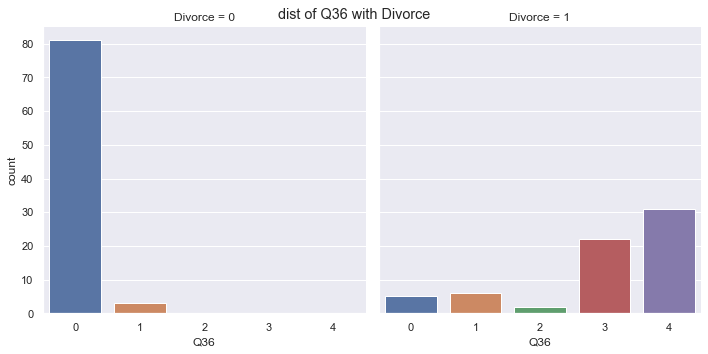

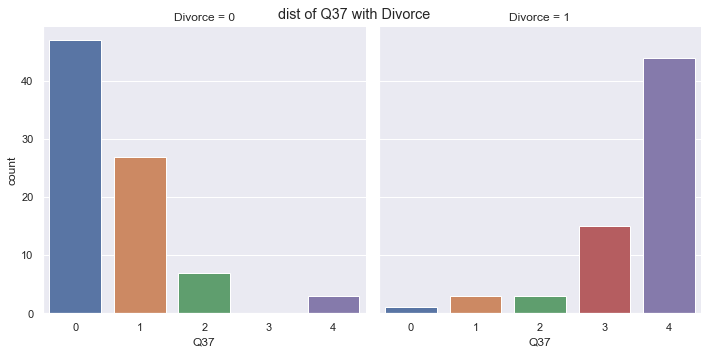

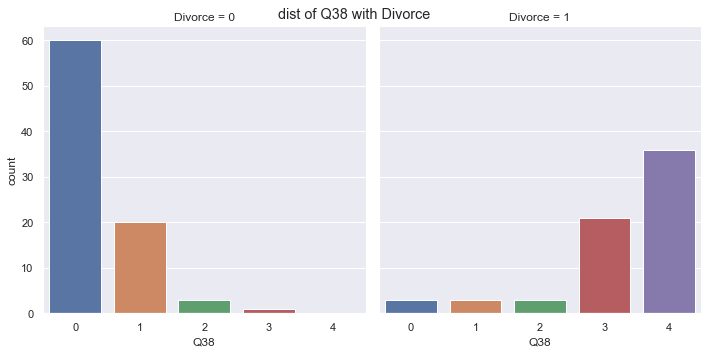

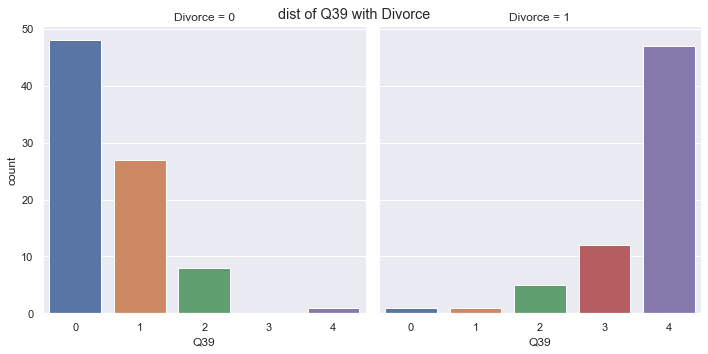

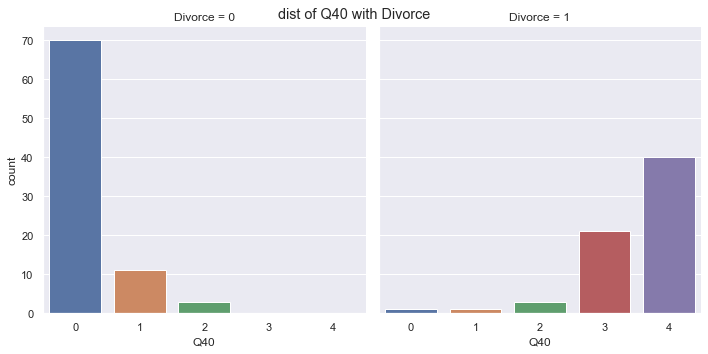

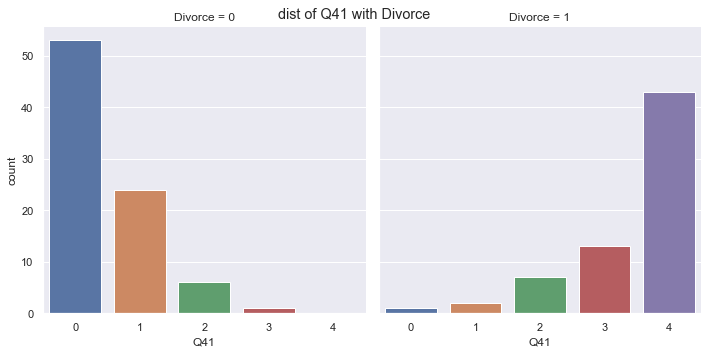

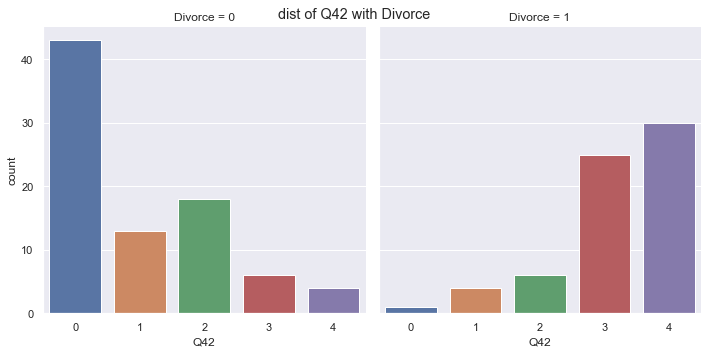

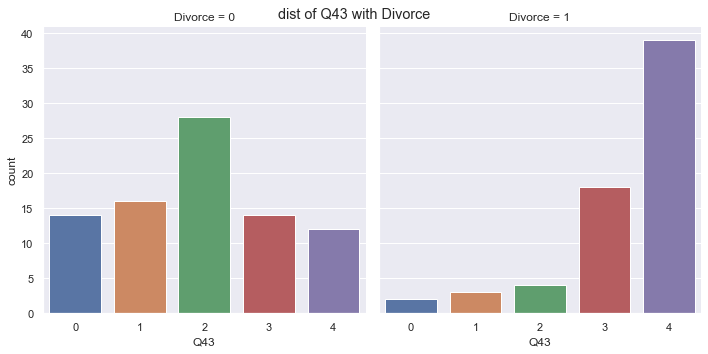

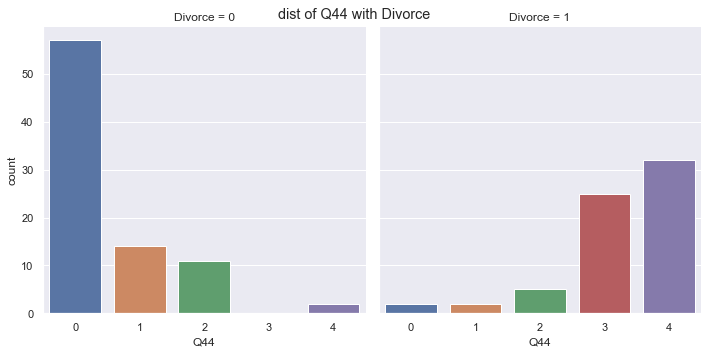

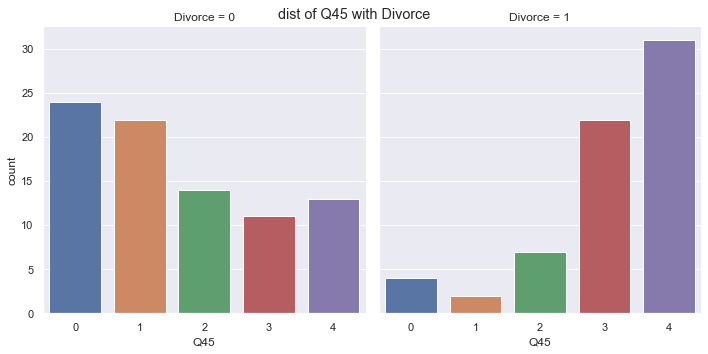

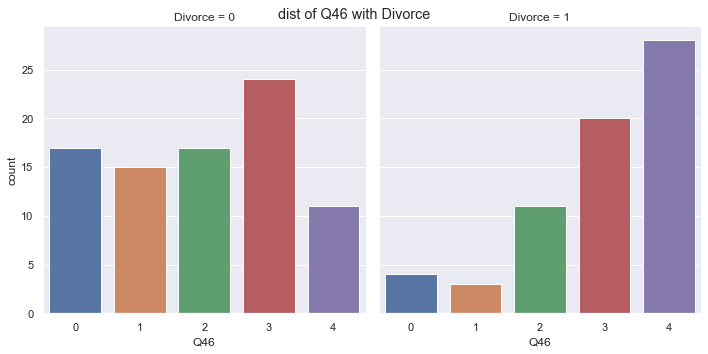

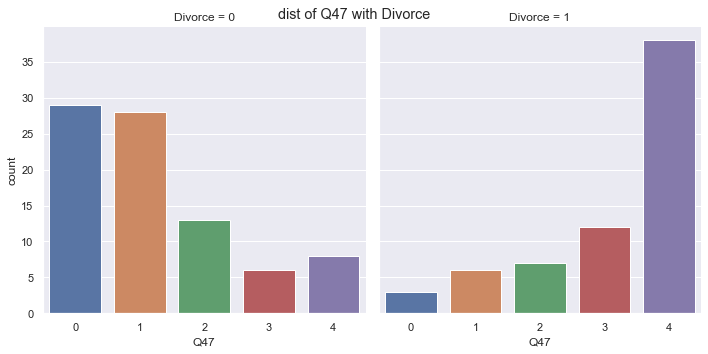

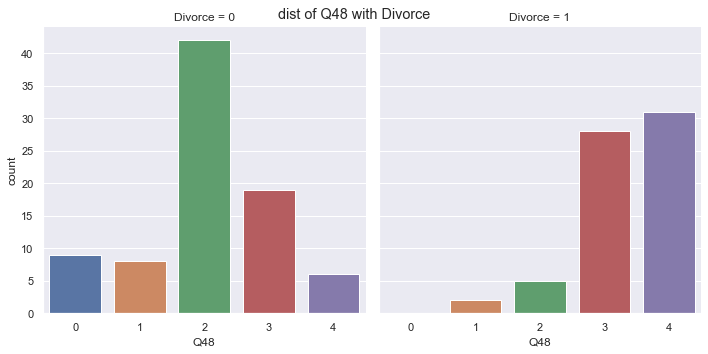

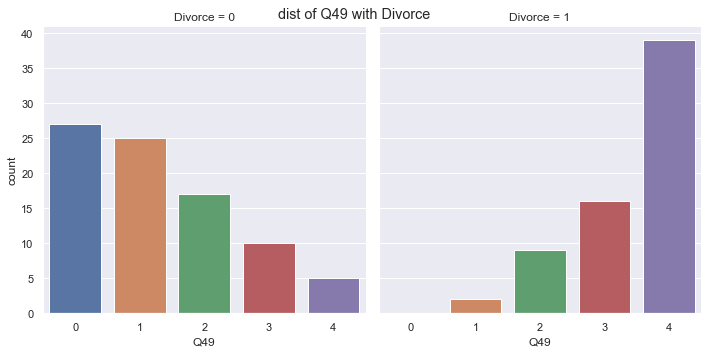

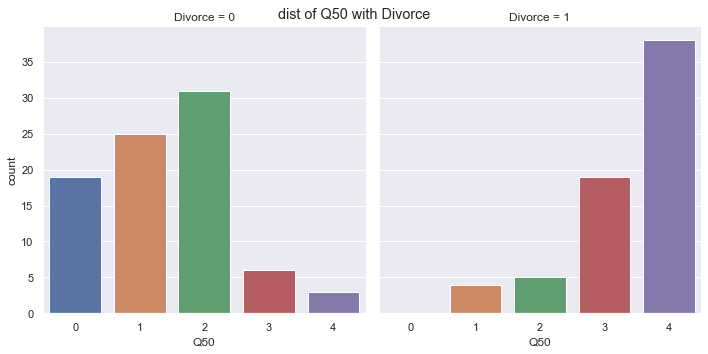

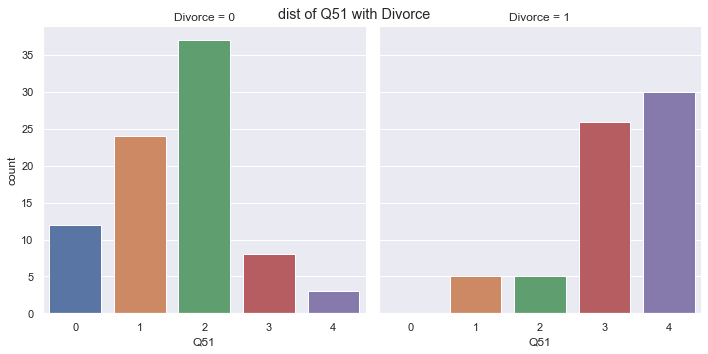

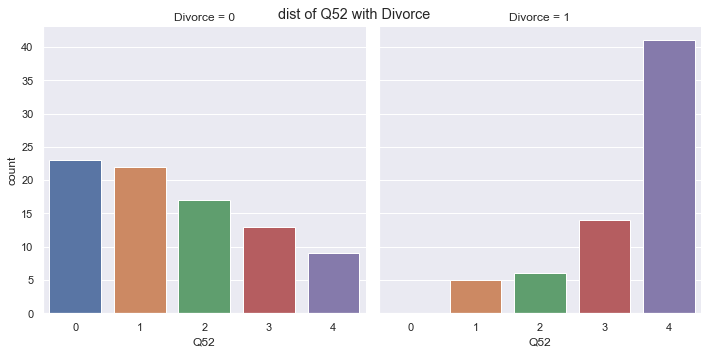

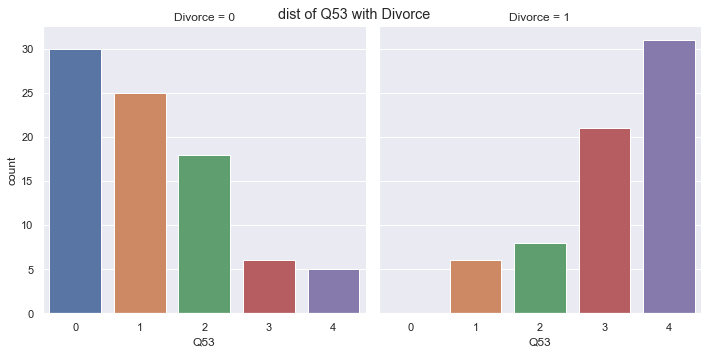

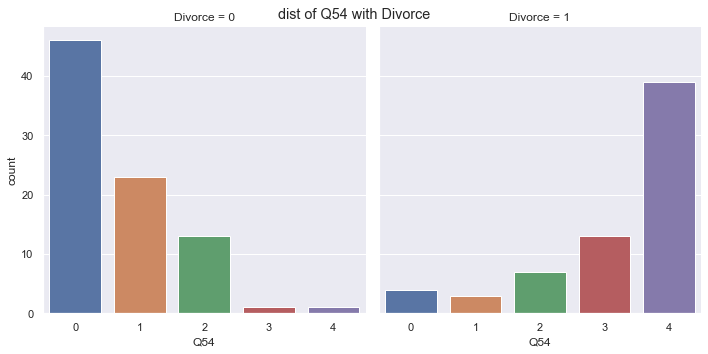

In [55]:
for i in divorce.drop('Divorce',axis =1).columns:
    dis_q_divorce(i)

Most married people are left skweed and divorced right skewed excexpt for Q6 Q7 Q43 Q45 Q46 Q48 Q50 Q51 will check more on these?

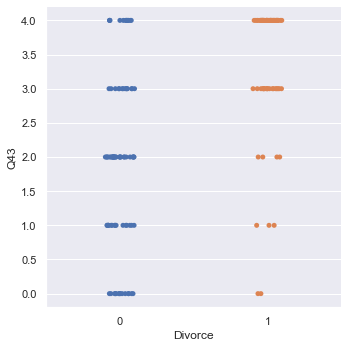

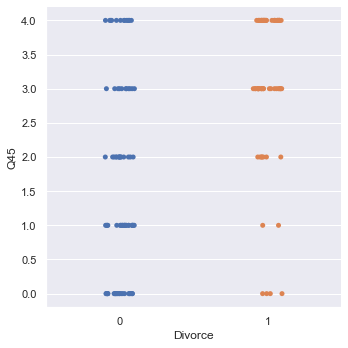

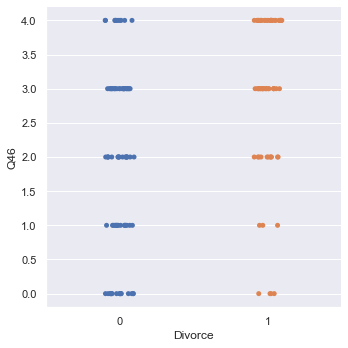

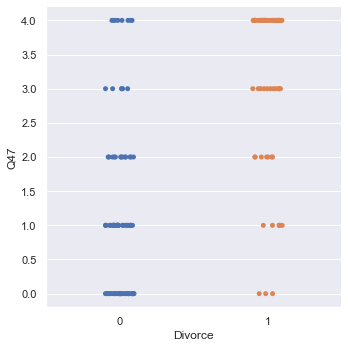

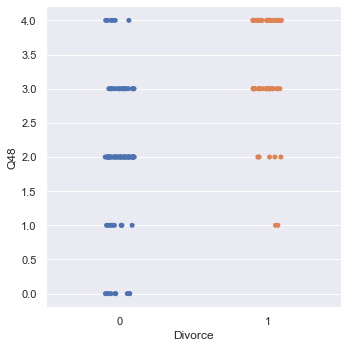

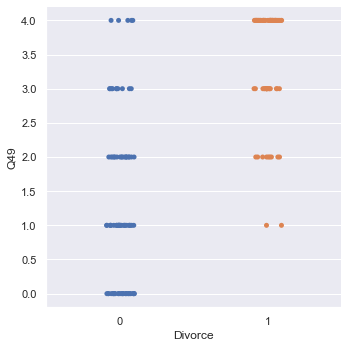

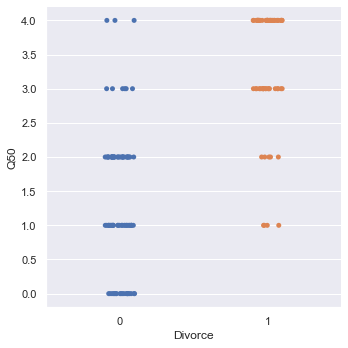

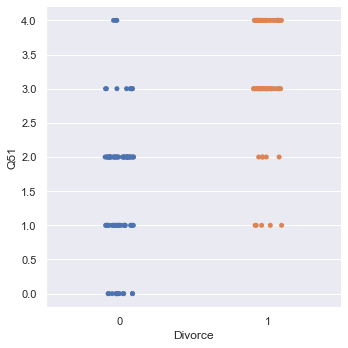

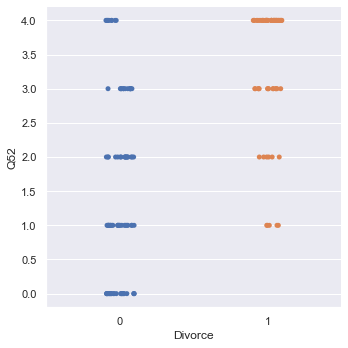

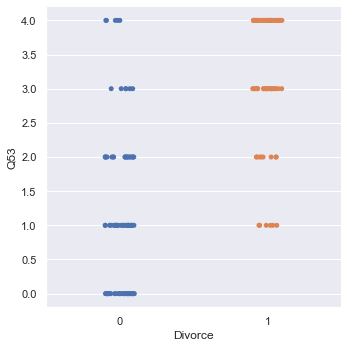

In [30]:
for i in question_ag:    
    sns.catplot(x="Divorce",y =i ,data = divorce)

All of these colmns ['Q43','Q45','Q46','Q47','Q48','Q49','Q50','Q51','Q52','Q53']IN TERMS answers couldnt infer if participants were divorced could be seen as not that important

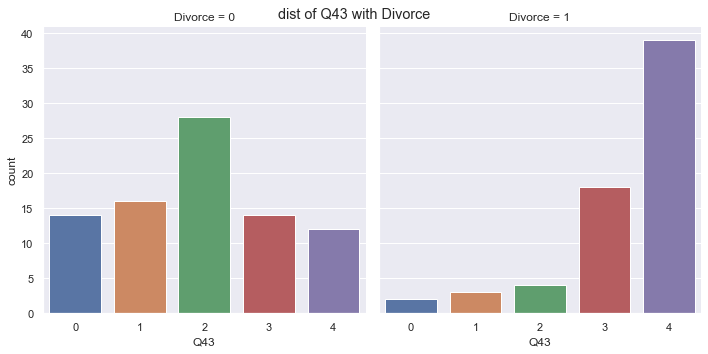

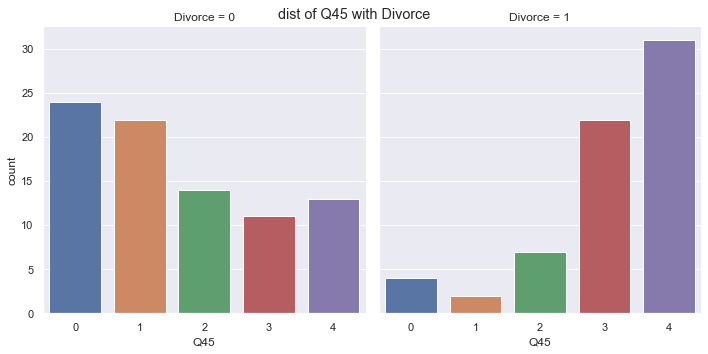

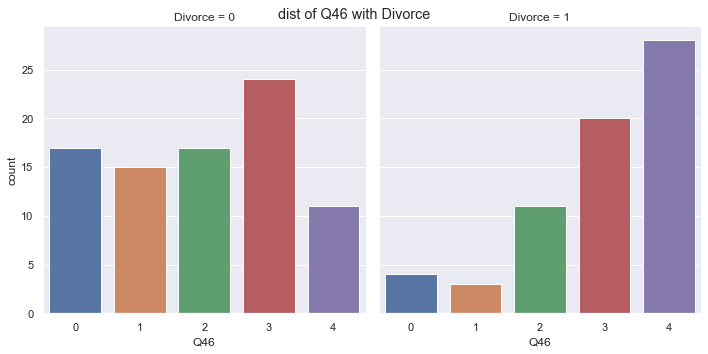

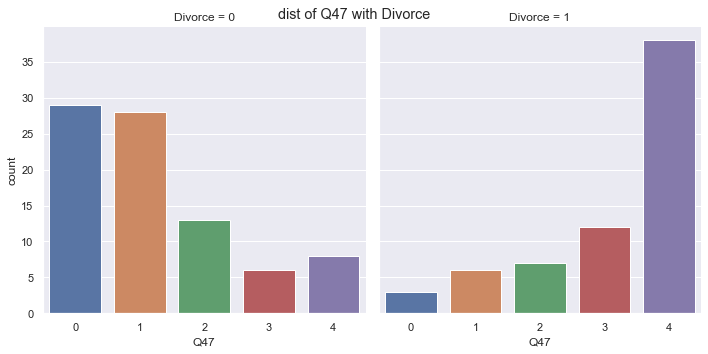

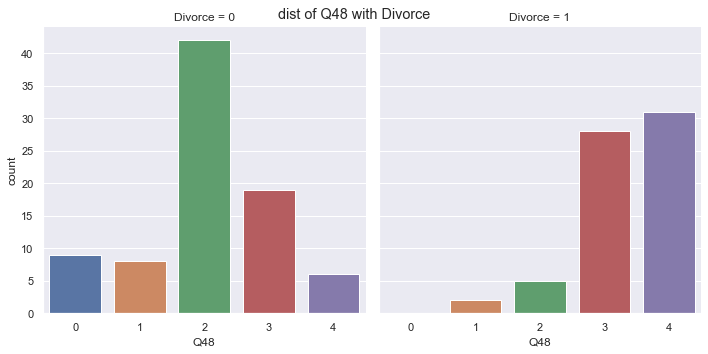

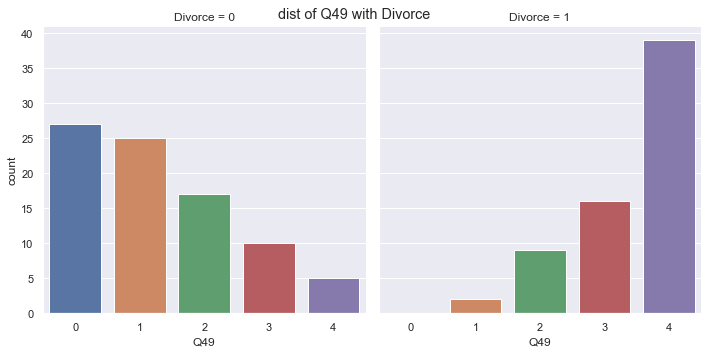

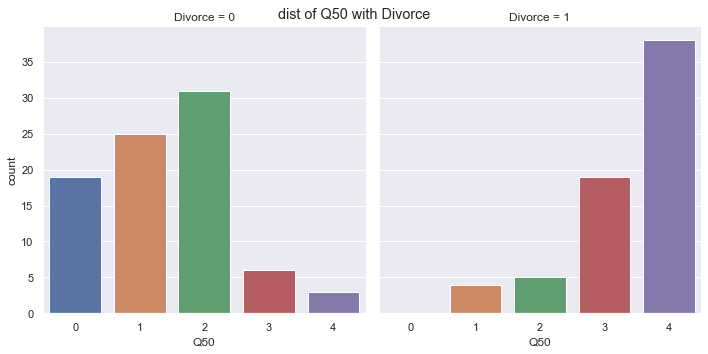

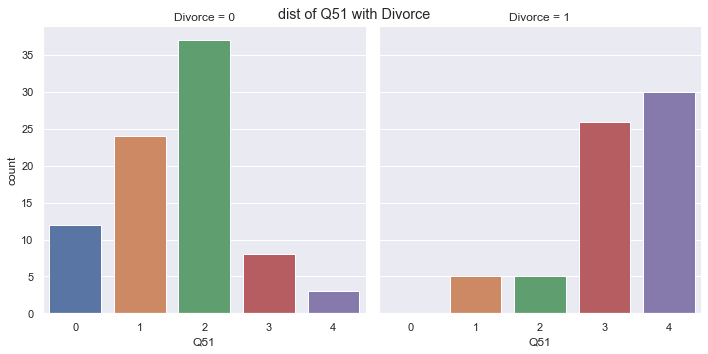

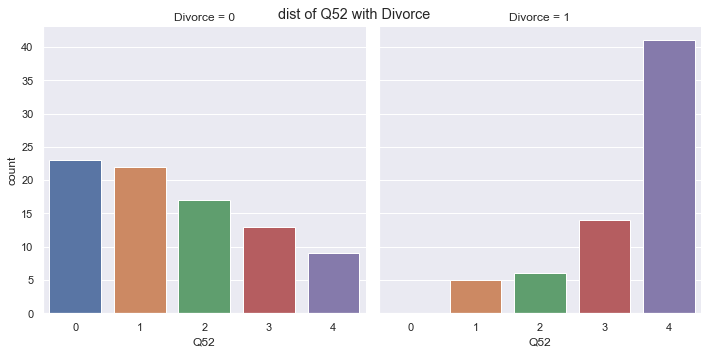

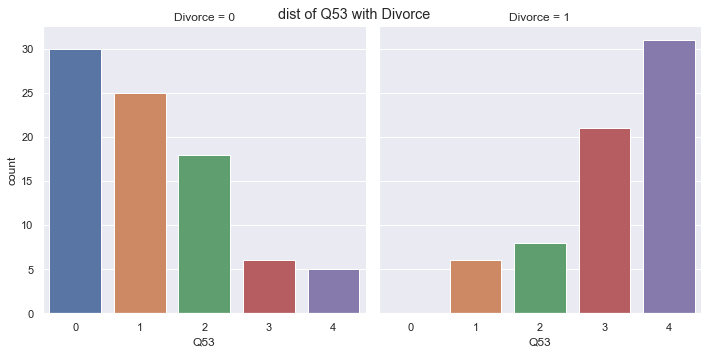

In [53]:
for i in question_ag:    
     dis_q_divorce(i)

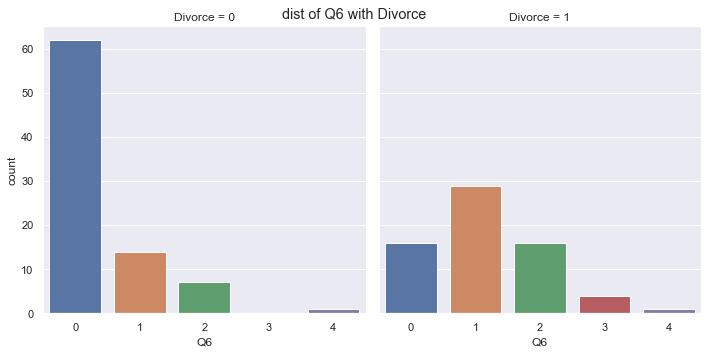

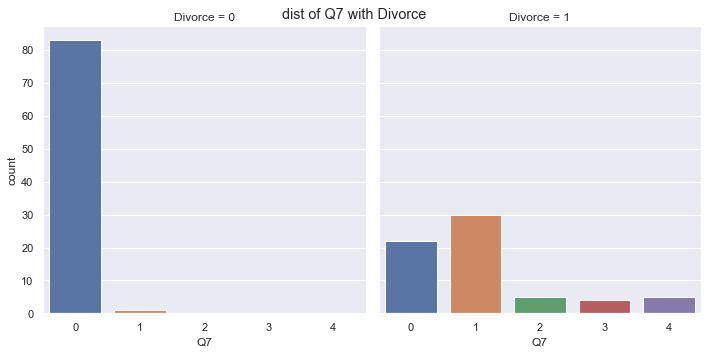

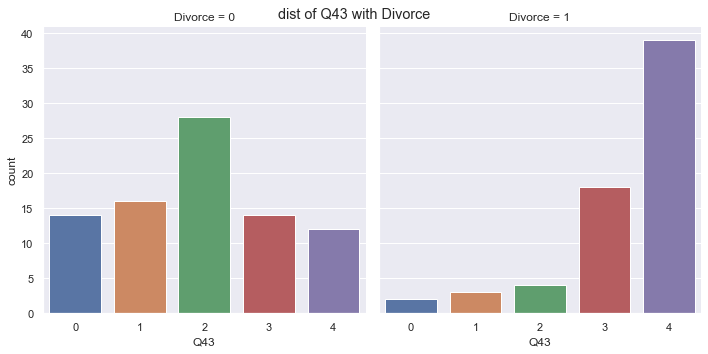

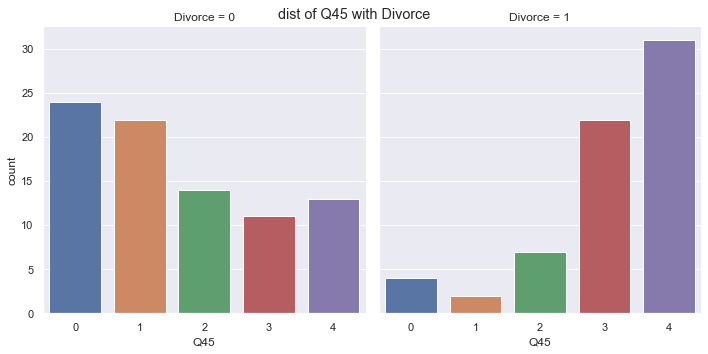

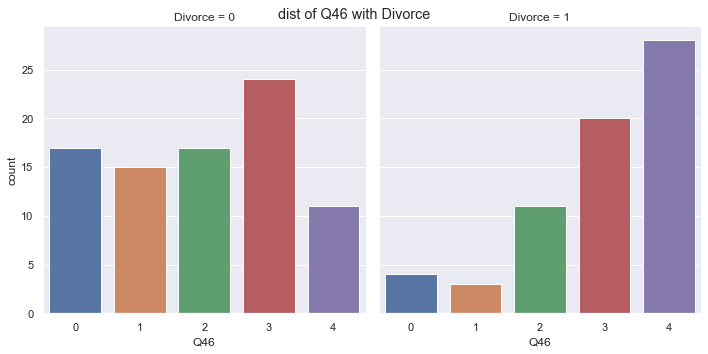

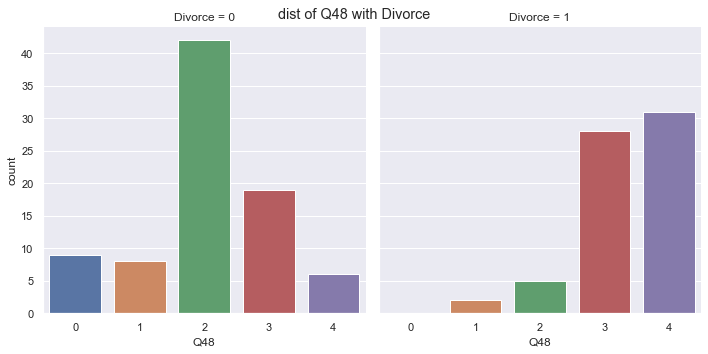

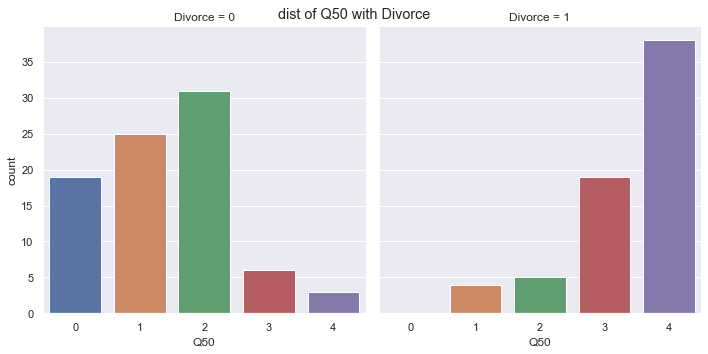

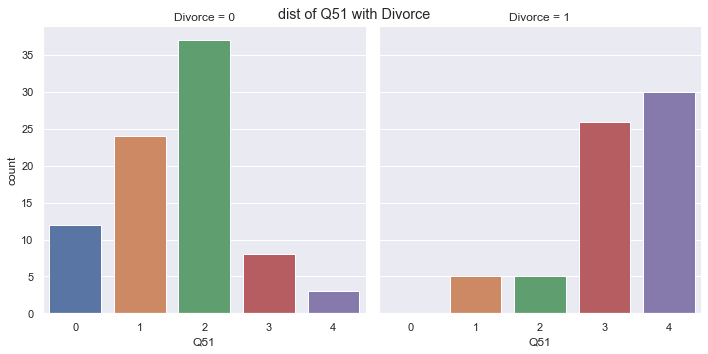

In [35]:
for i in ['Q6', 'Q7', 'Q43', 'Q45', 'Q46', 'Q48' ,'Q50' ,'Q51']:    
     dis_q_divorce(i)

most people both married and divorce disagree with Q7,Q6 this questions could be seen least imortant  most agree married answers where in the middle with Q43,Q48,Q51,Q50